# Example 6a. World trade network (unweighted)

In this example, we demonstrate a practical use case scenario of VIRGMo on the world trade data[1]. The network's nodes represent the countries and the weight of each edge $(i,j)$ is the total export across all available product types in 2010 from the vertex $i$ to $j$. Clearly, the correct number of groups and the class assignments are not known. In this notebook, we analyze the unweighted edges, the weights are utilized in the next one.

[1] The Observatory of Economic Complexity, HS6 REV. 2007 (2008 - 2017). https://oec.world/en/resources/data/

In [1]:
import torch
import numpy as np
np.set_printoptions(precision=2)
import pandas as pd
import matplotlib.pyplot as plt
from virgmo.vi_sbm import VI_SBM, VI_DCSBM
from virgmo.graph_models import SBM, DCSBM, EdgesDataset
import seaborn as sns
sns.reset_orig()
torch.manual_seed(42)

In [2]:
# Load the data

df = pd.read_csv('../data/World trade/A2010.csv', index_col=0)
A = torch.FloatTensor(np.array(df)) 
N = len(A)
A_edges = torch.where(A>0, torch.ones(A.size()), torch.zeros(A.size()))    
dl_sbm = DataLoader(EdgesDataset(A), batch_size=256, shuffle=True, num_workers=0)
countries_id = np.array(df.columns)

First, let us plot the network's adjacency matrix $A$ and its weight matrix $w$ (the logarithm of weights is used for more clear visualization).

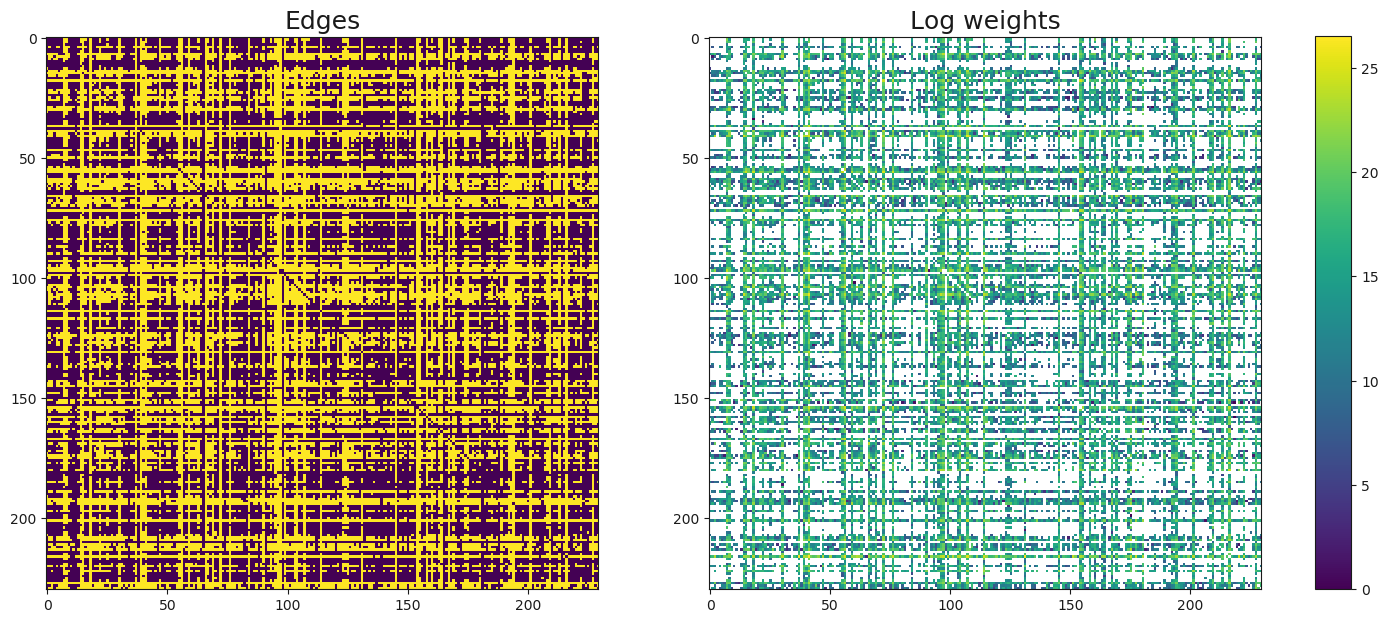

In [69]:
fig, axs = plt.subplots(1,2, figsize=(18,9))
axs[0].set_title('Edges', size=18)
axs[1].set_title('Log weights', size=18)
axs[0].imshow(A_edges.numpy(), cmap='viridis')
ax = axs[1].imshow(A.log().numpy(), cmap='viridis')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.188, 0.02, 0.615])
fig.colorbar(ax, cax=cbar_ax, aspect=30)
plt.show()

## SBM

We start the standard SBM. We assume that there is no more than 12 classes. The best estimations can actually have less, in this case, some of the classes will be empty. If there is no empty classes we suggest to repite the training with a larger number of groups.

In [4]:
num_classes = 12

dataloader = DataLoader(EdgesDataset(A), batch_size=N*4, shuffle=True, num_workers=0)

vi = VI_SBM(num_nodes=N, num_classes=num_classes, 
                   priors={'theta_p':None, 
                           'B_p':None},
                   init_values={'etas':None, 
                                'thetas':None, 
                                'Bs':None})

In [5]:
vi.multi_train(dataloader, epochs=20, lrs = [0.1, 0.05, 0.01], trials=50)

>>>>>>> Training iteration #1 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 36380.04 | Epoch time 1.19
Epoch 2 | LR: 0.10 | Total loss: 25976.71 | Epoch time 0.83
Epoch 3 | LR: 0.10 | Total loss: 22253.89 | Epoch time 0.95
Epoch 4 | LR: 0.10 | Total loss: 20203.70 | Epoch time 0.95
Epoch 5 | LR: 0.10 | Total loss: 18672.97 | Epoch time 0.86
Epoch 6 | LR: 0.10 | Total loss: 17528.63 | Epoch time 0.93
Epoch 7 | LR: 0.10 | Total loss: 16632.80 | Epoch time 1.15
Epoch 8 | LR: 0.10 | Total loss: 15943.31 | Epoch time 1.10
Epoch 9 | LR: 0.10 | Total loss: 15444.14 | Epoch time 0.67
Epoch 10 | LR: 0.10 | Total loss: 15088.78 | Epoch time 0.65
Epoch 11 | LR: 0.10 | Total loss: 14831.92 | Epoch time 0.79
Epoch 12 | LR: 0.10 | Total loss: 14646.12 | Epoch time 0.74
Epoch 13 | LR: 0.10 | Total loss: 14506.57 | Epoch time 0.92
Epoch 14 | LR: 0.10 | Total loss: 14402.94 | Epoch time 0.62
Epoch 15 | LR: 0.10 | Total loss: 14322.71 | Epoch time 0.60
Epoch 16 | LR: 0.10 | Total los

Epoch 12 | LR: 0.10 | Total loss: 14574.58 | Epoch time 1.33
Epoch 13 | LR: 0.10 | Total loss: 14421.55 | Epoch time 1.24
Epoch 14 | LR: 0.10 | Total loss: 14294.33 | Epoch time 1.08
Epoch 15 | LR: 0.10 | Total loss: 14188.59 | Epoch time 0.79
Epoch 16 | LR: 0.10 | Total loss: 14108.96 | Epoch time 0.83
Epoch 17 | LR: 0.10 | Total loss: 14049.10 | Epoch time 0.83
Epoch 18 | LR: 0.10 | Total loss: 13998.79 | Epoch time 0.91
Epoch 19 | LR: 0.10 | Total loss: 13958.37 | Epoch time 0.74
Epoch 20 | LR: 0.10 | Total loss: 13924.71 | Epoch time 0.73
Epoch 21 | LR: 0.05 | Total loss: 13898.85 | Epoch time 0.77
Epoch 22 | LR: 0.05 | Total loss: 13875.48 | Epoch time 0.78
Epoch 23 | LR: 0.05 | Total loss: 13851.55 | Epoch time 1.91
Epoch 24 | LR: 0.05 | Total loss: 13837.12 | Epoch time 1.36
Epoch 25 | LR: 0.05 | Total loss: 13824.11 | Epoch time 1.18
Epoch 26 | LR: 0.05 | Total loss: 13812.10 | Epoch time 1.14
Epoch 27 | LR: 0.05 | Total loss: 13796.63 | Epoch time 1.11
Epoch 28 | LR: 0.05 | To

Epoch 24 | LR: 0.05 | Total loss: 13721.50 | Epoch time 0.78
Epoch 25 | LR: 0.05 | Total loss: 13702.65 | Epoch time 0.71
Epoch 26 | LR: 0.05 | Total loss: 13684.80 | Epoch time 0.71
Epoch 27 | LR: 0.05 | Total loss: 13665.75 | Epoch time 0.70
Epoch 28 | LR: 0.05 | Total loss: 13651.00 | Epoch time 0.70
Epoch 29 | LR: 0.05 | Total loss: 13639.56 | Epoch time 0.70
Epoch 30 | LR: 0.05 | Total loss: 13626.88 | Epoch time 0.69
Epoch 31 | LR: 0.05 | Total loss: 13616.33 | Epoch time 1.09
Epoch 32 | LR: 0.05 | Total loss: 13606.49 | Epoch time 1.05
Epoch 33 | LR: 0.05 | Total loss: 13596.47 | Epoch time 1.07
Epoch 34 | LR: 0.05 | Total loss: 13586.62 | Epoch time 0.99
Epoch 35 | LR: 0.05 | Total loss: 13576.63 | Epoch time 0.79
Epoch 36 | LR: 0.05 | Total loss: 13568.48 | Epoch time 1.27
Epoch 37 | LR: 0.05 | Total loss: 13561.37 | Epoch time 1.25
Epoch 38 | LR: 0.05 | Total loss: 13551.70 | Epoch time 0.97
Epoch 39 | LR: 0.05 | Total loss: 13543.29 | Epoch time 1.06
Epoch 40 | LR: 0.05 | To

Epoch 36 | LR: 0.05 | Total loss: 13631.28 | Epoch time 1.24
Epoch 37 | LR: 0.05 | Total loss: 13621.81 | Epoch time 0.98
Epoch 38 | LR: 0.05 | Total loss: 13616.83 | Epoch time 1.07
Epoch 39 | LR: 0.05 | Total loss: 13609.02 | Epoch time 0.70
Epoch 40 | LR: 0.05 | Total loss: 13603.80 | Epoch time 0.71
Epoch 41 | LR: 0.01 | Total loss: 13595.68 | Epoch time 1.11
Epoch 42 | LR: 0.01 | Total loss: 13592.17 | Epoch time 0.95
Epoch 43 | LR: 0.01 | Total loss: 13585.94 | Epoch time 1.13
Epoch 44 | LR: 0.01 | Total loss: 13579.77 | Epoch time 1.01
Epoch 45 | LR: 0.01 | Total loss: 13575.28 | Epoch time 1.08
Epoch 46 | LR: 0.01 | Total loss: 13570.32 | Epoch time 1.07
Epoch 47 | LR: 0.01 | Total loss: 13563.55 | Epoch time 0.87
Epoch 48 | LR: 0.01 | Total loss: 13560.70 | Epoch time 0.76
Epoch 49 | LR: 0.01 | Total loss: 13556.96 | Epoch time 0.73
Epoch 50 | LR: 0.01 | Total loss: 13551.97 | Epoch time 0.70
Epoch 51 | LR: 0.01 | Total loss: 13551.44 | Epoch time 0.72
Epoch 52 | LR: 0.01 | To

Epoch 48 | LR: 0.01 | Total loss: 13814.89 | Epoch time 0.68
Epoch 49 | LR: 0.01 | Total loss: 13809.27 | Epoch time 0.71
Epoch 50 | LR: 0.01 | Total loss: 13806.32 | Epoch time 0.69
Epoch 51 | LR: 0.01 | Total loss: 13799.36 | Epoch time 0.71
Epoch 52 | LR: 0.01 | Total loss: 13794.39 | Epoch time 0.76
Epoch 53 | LR: 0.01 | Total loss: 13789.49 | Epoch time 0.81
Epoch 54 | LR: 0.01 | Total loss: 13784.80 | Epoch time 0.87
Epoch 55 | LR: 0.01 | Total loss: 13777.14 | Epoch time 0.80
Epoch 56 | LR: 0.01 | Total loss: 13772.57 | Epoch time 0.76
Epoch 57 | LR: 0.01 | Total loss: 13766.49 | Epoch time 0.73
Epoch 58 | LR: 0.01 | Total loss: 13760.38 | Epoch time 0.73
Epoch 59 | LR: 0.01 | Total loss: 13755.94 | Epoch time 0.75
Epoch 60 | LR: 0.01 | Total loss: 13747.98 | Epoch time 0.73
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #10 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 36429.99 | Epoch time 0.70
Epoch 2 | LR: 0.10 | Total loss: 26572.88 | Epo

Epoch 60 | LR: 0.01 | Total loss: 13413.85 | Epoch time 0.68
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #12 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 36592.54 | Epoch time 0.73
Epoch 2 | LR: 0.10 | Total loss: 26697.51 | Epoch time 0.71
Epoch 3 | LR: 0.10 | Total loss: 22551.97 | Epoch time 0.73
Epoch 4 | LR: 0.10 | Total loss: 20147.83 | Epoch time 0.72
Epoch 5 | LR: 0.10 | Total loss: 18457.46 | Epoch time 0.77
Epoch 6 | LR: 0.10 | Total loss: 17270.25 | Epoch time 0.84
Epoch 7 | LR: 0.10 | Total loss: 16416.47 | Epoch time 0.93
Epoch 8 | LR: 0.10 | Total loss: 15779.48 | Epoch time 0.72
Epoch 9 | LR: 0.10 | Total loss: 15301.91 | Epoch time 0.74
Epoch 10 | LR: 0.10 | Total loss: 14956.43 | Epoch time 0.72
Epoch 11 | LR: 0.10 | Total loss: 14702.73 | Epoch time 0.73
Epoch 12 | LR: 0.10 | Total loss: 14514.33 | Epoch time 0.75
Epoch 13 | LR: 0.10 | Total loss: 14368.80 | Epoch time 0.78
Epoch 14 | LR: 0.10 | Total loss: 14248.33 | Epoch time

Epoch 10 | LR: 0.10 | Total loss: 14973.95 | Epoch time 1.54
Epoch 11 | LR: 0.10 | Total loss: 14768.99 | Epoch time 1.72
Epoch 12 | LR: 0.10 | Total loss: 14611.14 | Epoch time 0.99
Epoch 13 | LR: 0.10 | Total loss: 14477.99 | Epoch time 1.11
Epoch 14 | LR: 0.10 | Total loss: 14366.14 | Epoch time 0.71
Epoch 15 | LR: 0.10 | Total loss: 14270.75 | Epoch time 0.73
Epoch 16 | LR: 0.10 | Total loss: 14189.26 | Epoch time 0.70
Epoch 17 | LR: 0.10 | Total loss: 14120.70 | Epoch time 0.69
Epoch 18 | LR: 0.10 | Total loss: 14061.37 | Epoch time 0.72
Epoch 19 | LR: 0.10 | Total loss: 14008.30 | Epoch time 1.00
Epoch 20 | LR: 0.10 | Total loss: 13960.03 | Epoch time 0.77
Epoch 21 | LR: 0.05 | Total loss: 13917.65 | Epoch time 0.70
Epoch 22 | LR: 0.05 | Total loss: 13878.74 | Epoch time 0.70
Epoch 23 | LR: 0.05 | Total loss: 13843.42 | Epoch time 0.70
Epoch 24 | LR: 0.05 | Total loss: 13812.25 | Epoch time 0.76
Epoch 25 | LR: 0.05 | Total loss: 13781.14 | Epoch time 0.82
Epoch 26 | LR: 0.05 | To

Epoch 22 | LR: 0.05 | Total loss: 13651.81 | Epoch time 1.24
Epoch 23 | LR: 0.05 | Total loss: 13628.68 | Epoch time 1.02
Epoch 24 | LR: 0.05 | Total loss: 13611.67 | Epoch time 1.05
Epoch 25 | LR: 0.05 | Total loss: 13592.98 | Epoch time 1.04
Epoch 26 | LR: 0.05 | Total loss: 13578.53 | Epoch time 0.94
Epoch 27 | LR: 0.05 | Total loss: 13564.94 | Epoch time 1.17
Epoch 28 | LR: 0.05 | Total loss: 13553.62 | Epoch time 1.04
Epoch 29 | LR: 0.05 | Total loss: 13543.55 | Epoch time 0.99
Epoch 30 | LR: 0.05 | Total loss: 13534.95 | Epoch time 1.03
Epoch 31 | LR: 0.05 | Total loss: 13525.79 | Epoch time 1.10
Epoch 32 | LR: 0.05 | Total loss: 13514.53 | Epoch time 1.02
Epoch 33 | LR: 0.05 | Total loss: 13508.55 | Epoch time 0.80
Epoch 34 | LR: 0.05 | Total loss: 13501.74 | Epoch time 0.75
Epoch 35 | LR: 0.05 | Total loss: 13494.88 | Epoch time 0.69
Epoch 36 | LR: 0.05 | Total loss: 13489.11 | Epoch time 0.71
Epoch 37 | LR: 0.05 | Total loss: 13483.88 | Epoch time 1.00
Epoch 38 | LR: 0.05 | To

Epoch 34 | LR: 0.05 | Total loss: 13934.65 | Epoch time 0.83
Epoch 35 | LR: 0.05 | Total loss: 13926.35 | Epoch time 0.74
Epoch 36 | LR: 0.05 | Total loss: 13916.88 | Epoch time 0.75
Epoch 37 | LR: 0.05 | Total loss: 13912.03 | Epoch time 0.74
Epoch 38 | LR: 0.05 | Total loss: 13902.04 | Epoch time 0.85
Epoch 39 | LR: 0.05 | Total loss: 13894.89 | Epoch time 1.17
Epoch 40 | LR: 0.05 | Total loss: 13888.92 | Epoch time 0.83
Epoch 41 | LR: 0.01 | Total loss: 13881.80 | Epoch time 0.69
Epoch 42 | LR: 0.01 | Total loss: 13874.45 | Epoch time 0.70
Epoch 43 | LR: 0.01 | Total loss: 13867.90 | Epoch time 0.69
Epoch 44 | LR: 0.01 | Total loss: 13861.12 | Epoch time 0.72
Epoch 45 | LR: 0.01 | Total loss: 13852.63 | Epoch time 0.71
Epoch 46 | LR: 0.01 | Total loss: 13848.29 | Epoch time 0.73
Epoch 47 | LR: 0.01 | Total loss: 13842.04 | Epoch time 0.68
Epoch 48 | LR: 0.01 | Total loss: 13834.06 | Epoch time 0.73
Epoch 49 | LR: 0.01 | Total loss: 13829.98 | Epoch time 0.74
Epoch 50 | LR: 0.01 | To

Epoch 46 | LR: 0.01 | Total loss: 13567.72 | Epoch time 1.27
Epoch 47 | LR: 0.01 | Total loss: 13565.83 | Epoch time 1.10
Epoch 48 | LR: 0.01 | Total loss: 13563.79 | Epoch time 1.10
Epoch 49 | LR: 0.01 | Total loss: 13558.80 | Epoch time 1.14
Epoch 50 | LR: 0.01 | Total loss: 13556.94 | Epoch time 1.05
Epoch 51 | LR: 0.01 | Total loss: 13550.83 | Epoch time 1.12
Epoch 52 | LR: 0.01 | Total loss: 13550.01 | Epoch time 1.00
Epoch 53 | LR: 0.01 | Total loss: 13547.12 | Epoch time 1.13
Epoch 54 | LR: 0.01 | Total loss: 13543.02 | Epoch time 0.98
Epoch 55 | LR: 0.01 | Total loss: 13540.32 | Epoch time 0.93
Epoch 56 | LR: 0.01 | Total loss: 13537.28 | Epoch time 0.69
Epoch 57 | LR: 0.01 | Total loss: 13535.70 | Epoch time 0.70
Epoch 58 | LR: 0.01 | Total loss: 13531.32 | Epoch time 0.70
Epoch 59 | LR: 0.01 | Total loss: 13528.44 | Epoch time 0.71
Epoch 60 | LR: 0.01 | Total loss: 13526.61 | Epoch time 0.71
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #21 

>>>>>>>>>>>> Sta

Epoch 58 | LR: 0.01 | Total loss: 13615.03 | Epoch time 0.71
Epoch 59 | LR: 0.01 | Total loss: 13610.16 | Epoch time 0.70
Epoch 60 | LR: 0.01 | Total loss: 13608.66 | Epoch time 0.70
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #23 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 36663.16 | Epoch time 0.74
Epoch 2 | LR: 0.10 | Total loss: 27012.79 | Epoch time 1.28
Epoch 3 | LR: 0.10 | Total loss: 22876.73 | Epoch time 1.20
Epoch 4 | LR: 0.10 | Total loss: 20211.90 | Epoch time 1.50
Epoch 5 | LR: 0.10 | Total loss: 18419.65 | Epoch time 1.34
Epoch 6 | LR: 0.10 | Total loss: 17187.38 | Epoch time 1.09
Epoch 7 | LR: 0.10 | Total loss: 16334.06 | Epoch time 0.76
Epoch 8 | LR: 0.10 | Total loss: 15729.31 | Epoch time 0.85
Epoch 9 | LR: 0.10 | Total loss: 15286.24 | Epoch time 1.36
Epoch 10 | LR: 0.10 | Total loss: 14948.90 | Epoch time 1.29
Epoch 11 | LR: 0.10 | Total loss: 14690.22 | Epoch time 1.74
Epoch 12 | LR: 0.10 | Total loss: 14496.29 | Epoch time

Epoch 8 | LR: 0.10 | Total loss: 15633.77 | Epoch time 0.78
Epoch 9 | LR: 0.10 | Total loss: 15217.22 | Epoch time 0.87
Epoch 10 | LR: 0.10 | Total loss: 14904.90 | Epoch time 0.77
Epoch 11 | LR: 0.10 | Total loss: 14670.65 | Epoch time 0.75
Epoch 12 | LR: 0.10 | Total loss: 14486.74 | Epoch time 0.81
Epoch 13 | LR: 0.10 | Total loss: 14339.70 | Epoch time 0.77
Epoch 14 | LR: 0.10 | Total loss: 14222.43 | Epoch time 0.76
Epoch 15 | LR: 0.10 | Total loss: 14128.26 | Epoch time 0.77
Epoch 16 | LR: 0.10 | Total loss: 14045.83 | Epoch time 0.78
Epoch 17 | LR: 0.10 | Total loss: 13979.83 | Epoch time 0.77
Epoch 18 | LR: 0.10 | Total loss: 13920.96 | Epoch time 0.78
Epoch 19 | LR: 0.10 | Total loss: 13870.21 | Epoch time 0.74
Epoch 20 | LR: 0.10 | Total loss: 13830.00 | Epoch time 0.74
Epoch 21 | LR: 0.05 | Total loss: 13790.54 | Epoch time 0.77
Epoch 22 | LR: 0.05 | Total loss: 13758.84 | Epoch time 0.73
Epoch 23 | LR: 0.05 | Total loss: 13729.07 | Epoch time 0.99
Epoch 24 | LR: 0.05 | Tota

Epoch 20 | LR: 0.10 | Total loss: 13951.13 | Epoch time 1.03
Epoch 21 | LR: 0.05 | Total loss: 13920.63 | Epoch time 1.24
Epoch 22 | LR: 0.05 | Total loss: 13896.61 | Epoch time 1.07
Epoch 23 | LR: 0.05 | Total loss: 13874.30 | Epoch time 0.88
Epoch 24 | LR: 0.05 | Total loss: 13857.54 | Epoch time 0.82
Epoch 25 | LR: 0.05 | Total loss: 13840.00 | Epoch time 1.00
Epoch 26 | LR: 0.05 | Total loss: 13825.38 | Epoch time 1.09
Epoch 27 | LR: 0.05 | Total loss: 13811.31 | Epoch time 0.90
Epoch 28 | LR: 0.05 | Total loss: 13800.92 | Epoch time 0.76
Epoch 29 | LR: 0.05 | Total loss: 13790.54 | Epoch time 0.73
Epoch 30 | LR: 0.05 | Total loss: 13778.58 | Epoch time 0.77
Epoch 31 | LR: 0.05 | Total loss: 13769.12 | Epoch time 0.78
Epoch 32 | LR: 0.05 | Total loss: 13757.37 | Epoch time 0.73
Epoch 33 | LR: 0.05 | Total loss: 13749.90 | Epoch time 0.78
Epoch 34 | LR: 0.05 | Total loss: 13740.74 | Epoch time 0.82
Epoch 35 | LR: 0.05 | Total loss: 13732.26 | Epoch time 0.76
Epoch 36 | LR: 0.05 | To

Epoch 32 | LR: 0.05 | Total loss: 13846.54 | Epoch time 0.83
Epoch 33 | LR: 0.05 | Total loss: 13836.76 | Epoch time 0.77
Epoch 34 | LR: 0.05 | Total loss: 13830.00 | Epoch time 0.77
Epoch 35 | LR: 0.05 | Total loss: 13821.00 | Epoch time 0.73
Epoch 36 | LR: 0.05 | Total loss: 13812.45 | Epoch time 0.79
Epoch 37 | LR: 0.05 | Total loss: 13801.79 | Epoch time 0.78
Epoch 38 | LR: 0.05 | Total loss: 13793.38 | Epoch time 0.76
Epoch 39 | LR: 0.05 | Total loss: 13784.53 | Epoch time 0.76
Epoch 40 | LR: 0.05 | Total loss: 13775.82 | Epoch time 0.76
Epoch 41 | LR: 0.01 | Total loss: 13767.87 | Epoch time 0.73
Epoch 42 | LR: 0.01 | Total loss: 13760.39 | Epoch time 0.75
Epoch 43 | LR: 0.01 | Total loss: 13747.16 | Epoch time 0.75
Epoch 44 | LR: 0.01 | Total loss: 13738.42 | Epoch time 0.73
Epoch 45 | LR: 0.01 | Total loss: 13731.48 | Epoch time 0.74
Epoch 46 | LR: 0.01 | Total loss: 13724.41 | Epoch time 0.78
Epoch 47 | LR: 0.01 | Total loss: 13715.80 | Epoch time 0.71
Epoch 48 | LR: 0.01 | To

Epoch 44 | LR: 0.01 | Total loss: 13605.04 | Epoch time 1.41
Epoch 45 | LR: 0.01 | Total loss: 13599.71 | Epoch time 1.35
Epoch 46 | LR: 0.01 | Total loss: 13597.04 | Epoch time 1.03
Epoch 47 | LR: 0.01 | Total loss: 13591.16 | Epoch time 1.02
Epoch 48 | LR: 0.01 | Total loss: 13585.78 | Epoch time 1.01
Epoch 49 | LR: 0.01 | Total loss: 13583.02 | Epoch time 1.11
Epoch 50 | LR: 0.01 | Total loss: 13579.01 | Epoch time 1.52
Epoch 51 | LR: 0.01 | Total loss: 13576.24 | Epoch time 0.83
Epoch 52 | LR: 0.01 | Total loss: 13572.86 | Epoch time 0.75
Epoch 53 | LR: 0.01 | Total loss: 13568.85 | Epoch time 0.70
Epoch 54 | LR: 0.01 | Total loss: 13564.17 | Epoch time 1.09
Epoch 55 | LR: 0.01 | Total loss: 13560.98 | Epoch time 1.36
Epoch 56 | LR: 0.01 | Total loss: 13557.99 | Epoch time 1.02
Epoch 57 | LR: 0.01 | Total loss: 13552.02 | Epoch time 1.31
Epoch 58 | LR: 0.01 | Total loss: 13548.58 | Epoch time 0.95
Epoch 59 | LR: 0.01 | Total loss: 13545.23 | Epoch time 1.15
Epoch 60 | LR: 0.01 | To

Epoch 56 | LR: 0.01 | Total loss: 13767.23 | Epoch time 0.83
Epoch 57 | LR: 0.01 | Total loss: 13758.88 | Epoch time 0.74
Epoch 58 | LR: 0.01 | Total loss: 13747.68 | Epoch time 0.75
Epoch 59 | LR: 0.01 | Total loss: 13739.40 | Epoch time 0.69
Epoch 60 | LR: 0.01 | Total loss: 13728.49 | Epoch time 0.73
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #34 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 36498.15 | Epoch time 0.77
Epoch 2 | LR: 0.10 | Total loss: 27374.52 | Epoch time 0.73
Epoch 3 | LR: 0.10 | Total loss: 23445.03 | Epoch time 0.77
Epoch 4 | LR: 0.10 | Total loss: 20655.91 | Epoch time 0.92
Epoch 5 | LR: 0.10 | Total loss: 18743.63 | Epoch time 0.84
Epoch 6 | LR: 0.10 | Total loss: 17475.92 | Epoch time 0.76
Epoch 7 | LR: 0.10 | Total loss: 16617.20 | Epoch time 0.72
Epoch 8 | LR: 0.10 | Total loss: 16004.44 | Epoch time 0.75
Epoch 9 | LR: 0.10 | Total loss: 15554.44 | Epoch time 0.77
Epoch 10 | LR: 0.10 | Total loss: 15221.33 | Epoch time

Epoch 6 | LR: 0.10 | Total loss: 17199.97 | Epoch time 1.04
Epoch 7 | LR: 0.10 | Total loss: 16287.55 | Epoch time 1.22
Epoch 8 | LR: 0.10 | Total loss: 15629.34 | Epoch time 1.28
Epoch 9 | LR: 0.10 | Total loss: 15151.48 | Epoch time 1.24
Epoch 10 | LR: 0.10 | Total loss: 14817.86 | Epoch time 1.93
Epoch 11 | LR: 0.10 | Total loss: 14583.48 | Epoch time 1.85
Epoch 12 | LR: 0.10 | Total loss: 14410.05 | Epoch time 1.11
Epoch 13 | LR: 0.10 | Total loss: 14281.50 | Epoch time 0.74
Epoch 14 | LR: 0.10 | Total loss: 14180.75 | Epoch time 0.73
Epoch 15 | LR: 0.10 | Total loss: 14102.16 | Epoch time 0.99
Epoch 16 | LR: 0.10 | Total loss: 14036.67 | Epoch time 1.14
Epoch 17 | LR: 0.10 | Total loss: 13983.30 | Epoch time 1.02
Epoch 18 | LR: 0.10 | Total loss: 13937.25 | Epoch time 1.28
Epoch 19 | LR: 0.10 | Total loss: 13900.63 | Epoch time 0.87
Epoch 20 | LR: 0.10 | Total loss: 13870.81 | Epoch time 0.70
Epoch 21 | LR: 0.05 | Total loss: 13842.07 | Epoch time 0.70
Epoch 22 | LR: 0.05 | Total 

Epoch 18 | LR: 0.10 | Total loss: 14002.33 | Epoch time 1.09
Epoch 19 | LR: 0.10 | Total loss: 13948.92 | Epoch time 1.16
Epoch 20 | LR: 0.10 | Total loss: 13902.67 | Epoch time 1.14
Epoch 21 | LR: 0.05 | Total loss: 13865.20 | Epoch time 0.83
Epoch 22 | LR: 0.05 | Total loss: 13834.12 | Epoch time 1.15
Epoch 23 | LR: 0.05 | Total loss: 13807.76 | Epoch time 1.06
Epoch 24 | LR: 0.05 | Total loss: 13782.56 | Epoch time 0.95
Epoch 25 | LR: 0.05 | Total loss: 13761.88 | Epoch time 0.75
Epoch 26 | LR: 0.05 | Total loss: 13744.49 | Epoch time 0.90
Epoch 27 | LR: 0.05 | Total loss: 13724.89 | Epoch time 1.31
Epoch 28 | LR: 0.05 | Total loss: 13707.58 | Epoch time 1.21
Epoch 29 | LR: 0.05 | Total loss: 13691.17 | Epoch time 1.71
Epoch 30 | LR: 0.05 | Total loss: 13676.06 | Epoch time 0.88
Epoch 31 | LR: 0.05 | Total loss: 13654.76 | Epoch time 1.12
Epoch 32 | LR: 0.05 | Total loss: 13636.11 | Epoch time 0.72
Epoch 33 | LR: 0.05 | Total loss: 13618.77 | Epoch time 0.72
Epoch 34 | LR: 0.05 | To

Epoch 30 | LR: 0.05 | Total loss: 13725.38 | Epoch time 1.18
Epoch 31 | LR: 0.05 | Total loss: 13711.36 | Epoch time 0.92
Epoch 32 | LR: 0.05 | Total loss: 13696.33 | Epoch time 0.95
Epoch 33 | LR: 0.05 | Total loss: 13681.55 | Epoch time 1.09
Epoch 34 | LR: 0.05 | Total loss: 13669.28 | Epoch time 1.45
Epoch 35 | LR: 0.05 | Total loss: 13653.10 | Epoch time 0.97
Epoch 36 | LR: 0.05 | Total loss: 13639.57 | Epoch time 1.35
Epoch 37 | LR: 0.05 | Total loss: 13626.20 | Epoch time 1.22
Epoch 38 | LR: 0.05 | Total loss: 13613.46 | Epoch time 1.15
Epoch 39 | LR: 0.05 | Total loss: 13603.53 | Epoch time 1.15
Epoch 40 | LR: 0.05 | Total loss: 13596.05 | Epoch time 1.25
Epoch 41 | LR: 0.01 | Total loss: 13586.84 | Epoch time 1.20
Epoch 42 | LR: 0.01 | Total loss: 13582.19 | Epoch time 1.03
Epoch 43 | LR: 0.01 | Total loss: 13577.60 | Epoch time 1.05
Epoch 44 | LR: 0.01 | Total loss: 13571.50 | Epoch time 1.33
Epoch 45 | LR: 0.01 | Total loss: 13568.99 | Epoch time 1.24
Epoch 46 | LR: 0.01 | To

Epoch 42 | LR: 0.01 | Total loss: 13541.56 | Epoch time 1.23
Epoch 43 | LR: 0.01 | Total loss: 13533.95 | Epoch time 1.21
Epoch 44 | LR: 0.01 | Total loss: 13527.29 | Epoch time 1.06
Epoch 45 | LR: 0.01 | Total loss: 13520.69 | Epoch time 1.17
Epoch 46 | LR: 0.01 | Total loss: 13511.92 | Epoch time 1.01
Epoch 47 | LR: 0.01 | Total loss: 13508.20 | Epoch time 0.73
Epoch 48 | LR: 0.01 | Total loss: 13501.95 | Epoch time 0.75
Epoch 49 | LR: 0.01 | Total loss: 13495.73 | Epoch time 0.71
Epoch 50 | LR: 0.01 | Total loss: 13492.27 | Epoch time 0.94
Epoch 51 | LR: 0.01 | Total loss: 13485.83 | Epoch time 1.09
Epoch 52 | LR: 0.01 | Total loss: 13481.50 | Epoch time 0.97
Epoch 53 | LR: 0.01 | Total loss: 13477.50 | Epoch time 0.75
Epoch 54 | LR: 0.01 | Total loss: 13475.49 | Epoch time 0.85
Epoch 55 | LR: 0.01 | Total loss: 13471.33 | Epoch time 0.81
Epoch 56 | LR: 0.01 | Total loss: 13468.90 | Epoch time 0.85
Epoch 57 | LR: 0.01 | Total loss: 13465.04 | Epoch time 0.81
Epoch 58 | LR: 0.01 | To

Epoch 54 | LR: 0.01 | Total loss: 13863.39 | Epoch time 0.87
Epoch 55 | LR: 0.01 | Total loss: 13859.28 | Epoch time 0.76
Epoch 56 | LR: 0.01 | Total loss: 13849.90 | Epoch time 0.71
Epoch 57 | LR: 0.01 | Total loss: 13847.93 | Epoch time 0.72
Epoch 58 | LR: 0.01 | Total loss: 13839.95 | Epoch time 0.80
Epoch 59 | LR: 0.01 | Total loss: 13834.28 | Epoch time 0.76
Epoch 60 | LR: 0.01 | Total loss: 13830.92 | Epoch time 0.75
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #45 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 36430.01 | Epoch time 0.78
Epoch 2 | LR: 0.10 | Total loss: 26435.89 | Epoch time 0.84
Epoch 3 | LR: 0.10 | Total loss: 22310.39 | Epoch time 0.76
Epoch 4 | LR: 0.10 | Total loss: 19750.71 | Epoch time 0.75
Epoch 5 | LR: 0.10 | Total loss: 18059.34 | Epoch time 0.85
Epoch 6 | LR: 0.10 | Total loss: 16940.22 | Epoch time 0.76
Epoch 7 | LR: 0.10 | Total loss: 16175.89 | Epoch time 0.77
Epoch 8 | LR: 0.10 | Total loss: 15641.98 | Epoch tim

Epoch 4 | LR: 0.10 | Total loss: 20107.96 | Epoch time 0.74
Epoch 5 | LR: 0.10 | Total loss: 18341.90 | Epoch time 0.73
Epoch 6 | LR: 0.10 | Total loss: 17075.04 | Epoch time 0.82
Epoch 7 | LR: 0.10 | Total loss: 16206.62 | Epoch time 0.81
Epoch 8 | LR: 0.10 | Total loss: 15627.44 | Epoch time 0.81
Epoch 9 | LR: 0.10 | Total loss: 15227.11 | Epoch time 0.72
Epoch 10 | LR: 0.10 | Total loss: 14936.89 | Epoch time 0.74
Epoch 11 | LR: 0.10 | Total loss: 14717.30 | Epoch time 0.80
Epoch 12 | LR: 0.10 | Total loss: 14547.61 | Epoch time 0.75
Epoch 13 | LR: 0.10 | Total loss: 14415.75 | Epoch time 0.72
Epoch 14 | LR: 0.10 | Total loss: 14318.37 | Epoch time 0.77
Epoch 15 | LR: 0.10 | Total loss: 14237.91 | Epoch time 0.94
Epoch 16 | LR: 0.10 | Total loss: 14174.94 | Epoch time 0.87
Epoch 17 | LR: 0.10 | Total loss: 14123.42 | Epoch time 0.76
Epoch 18 | LR: 0.10 | Total loss: 14079.01 | Epoch time 0.86
Epoch 19 | LR: 0.10 | Total loss: 14040.78 | Epoch time 1.13
Epoch 20 | LR: 0.10 | Total lo

Epoch 16 | LR: 0.10 | Total loss: 14363.47 | Epoch time 0.68
Epoch 17 | LR: 0.10 | Total loss: 14304.62 | Epoch time 0.78
Epoch 18 | LR: 0.10 | Total loss: 14250.97 | Epoch time 0.72
Epoch 19 | LR: 0.10 | Total loss: 14208.65 | Epoch time 0.69
Epoch 20 | LR: 0.10 | Total loss: 14171.41 | Epoch time 0.69
Epoch 21 | LR: 0.05 | Total loss: 14138.76 | Epoch time 0.74
Epoch 22 | LR: 0.05 | Total loss: 14114.16 | Epoch time 0.72
Epoch 23 | LR: 0.05 | Total loss: 14092.22 | Epoch time 0.74
Epoch 24 | LR: 0.05 | Total loss: 14070.74 | Epoch time 0.83
Epoch 25 | LR: 0.05 | Total loss: 14052.79 | Epoch time 0.75
Epoch 26 | LR: 0.05 | Total loss: 14036.25 | Epoch time 0.75
Epoch 27 | LR: 0.05 | Total loss: 14020.67 | Epoch time 0.70
Epoch 28 | LR: 0.05 | Total loss: 14007.57 | Epoch time 0.69
Epoch 29 | LR: 0.05 | Total loss: 13994.83 | Epoch time 0.75
Epoch 30 | LR: 0.05 | Total loss: 13980.89 | Epoch time 1.16
Epoch 31 | LR: 0.05 | Total loss: 13970.45 | Epoch time 1.06
Epoch 32 | LR: 0.05 | To

In [6]:
best_5 = vi.get_multi_losses()[:,-1].argsort()[:5]  

In [7]:
print('The lowest losses:', vi.get_multi_losses()[best_5,-1].numpy())

The lowest losses: [13370.52 13385.87 13391.58 13391.88 13400.87]


In [8]:
print('The number of classes in best trials:', 
      [len(vi.multi_results[0][i].argmax(dim=0).unique()) for i in best_5])

The number of classes in best trials: [12, 12, 12, 12, 12]


We see that the best trials have almost identical loss and no empty classes. Further, we look closely at the trial with the lowest loss.

In [10]:
class_sizes = lambda classes: np.array(pd.Series(classes.numpy()).value_counts().sort_index())

In [11]:
def permute_by_degree(classes, A, dim=0):
    '''Permutate class names by the average node degree,
    so the produced class 0 has the lowest average degree.'''
    df_degree = pd.DataFrame(torch.stack((A.sum(dim=dim), classes)).t().numpy(), columns=['degree', 'class'])
    perm = np.array(df_degree.groupby(['class']).mean()).squeeze().argsort()
    output = torch.zeros(classes.size())
    uni = classes.unique().clone()
    for i in range(len(perm)):
        output = torch.where(classes==uni[perm[i]], 
                            torch.ones(classes.size())*i,
                            output)
    return output, perm

In [41]:
vi.load_state_dict(vi.state_dicts[best_5[0]])
q_eta, q_theta, q_B = vi.constrained_params()

In [42]:
sns.reset_orig()

In [43]:
sbm_classes = q_eta.argmax(dim=0).float()

We plot the adjacency and weights matrices sorted by the average in-degree of each class.

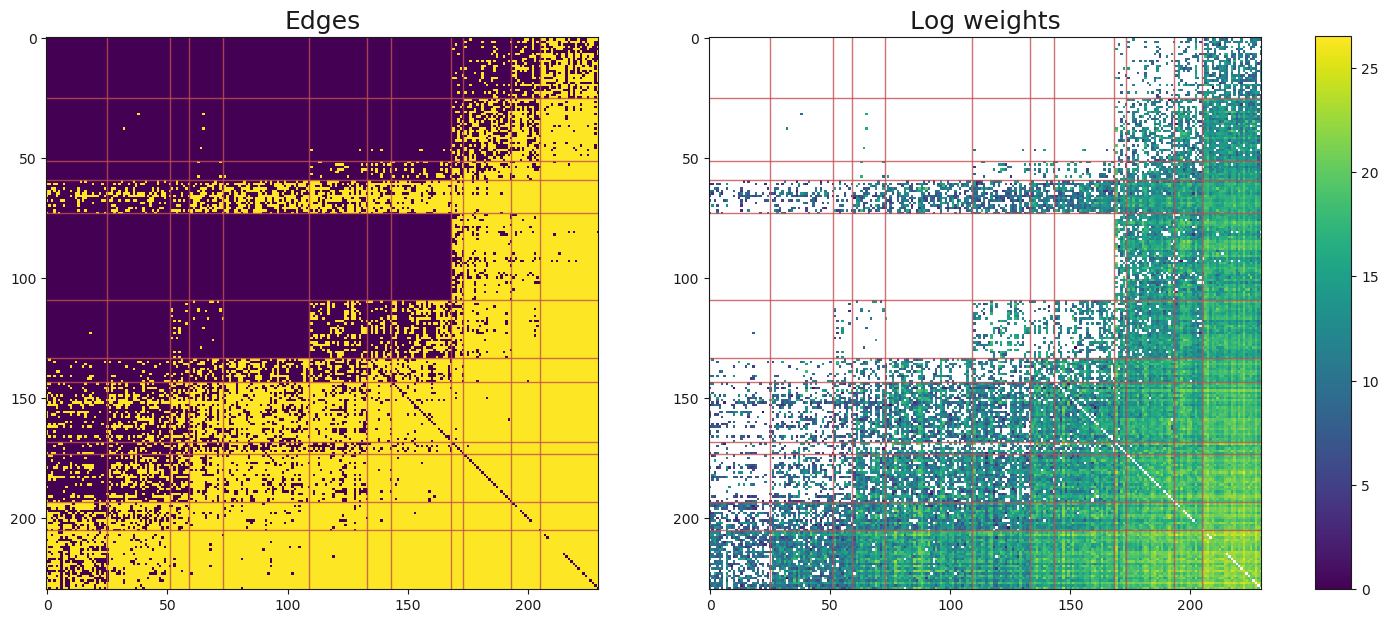

In [70]:
# Sort classes by the average in-degree (dim=0): number of importets to this country
sbm_classes, perm = permute_by_degree(sbm_classes, A_edges, 0)
order = sbm_classes.argsort()
cs = class_sizes(sbm_classes)
fig, axs = plt.subplots(1,2, figsize=(18,9))
axs[0].set_title('Edges', size=18)
axs[1].set_title('Log weights', size=18)
axs[0].imshow(A_edges[order,:][:,order].numpy(), cmap='viridis')
acc = -1
for i in cs[:-1]:
    acc += i
    axs[0].axvline(acc, color='r', linestyle='-', linewidth=1, alpha=0.8)
    axs[0].axhline(acc, color='r', linestyle='-', linewidth=1, alpha=0.8)
ax = axs[1].imshow(A.log()[order,:][:,order].numpy(), cmap='viridis')
acc = -1
for i in cs[:-1]:
    acc += i
    axs[1].axvline(acc, color='r', linestyle='-', linewidth=1, alpha=0.8)
    axs[1].axhline(acc, color='r', linestyle='-', linewidth=1, alpha=0.8)
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.188, 0.02, 0.615])
fig.colorbar(ax, cax=cbar_ax, aspect=30)
#plt.savefig('../examples/images/wt_A_sbm.pdf')
plt.show()


What contries belong to each class?

In [15]:
print('Total #countries:', len(countries_id))
for i in sbm_classes.unique().sort().values:
    g = countries_id[sbm_classes==i]
    #g.sort()
    print('Class %d (%d countries):' % (i, len(g)))
    print(g)

Total #countries: 230
Class 0 (26 countries):
['ata' 'atf' 'bvt' 'cck' 'cxr' 'esh' 'flk' 'fsm' 'hmd' 'iot' 'kir' 'mnp'
 'msr' 'myt' 'nfk' 'niu' 'nru' 'pcn' 'plw' 'sgs' 'shn' 'spm' 'tuv' 'umi'
 'vat' 'wlf']
Class 1 (26 countries):
['aia' 'asm' 'btn' 'cok' 'cym' 'eri' 'fro' 'gnb' 'gnq' 'grd' 'grl' 'gum'
 'kna' 'lca' 'lso' 'mhl' 'pse' 'slb' 'som' 'tca' 'tcd' 'tkl' 'tls' 'ton'
 'vut' 'wsm']
Class 2 (8 countries):
['abw' 'bdi' 'bmu' 'bwa' 'dji' 'mdv' 'stp' 'vct']
Class 3 (14 countries):
['alb' 'arm' 'aze' 'cpv' 'fji' 'kgz' 'mda' 'mmr' 'mne' 'mwi' 'ncl' 'npl'
 'pyf' 'zmb']
Class 4 (36 countries):
['ago' 'and' 'ant' 'bgd' 'brn' 'caf' 'cod' 'com' 'cub' 'gab' 'gib' 'gin'
 'hnd' 'hti' 'irq' 'kwt' 'lao' 'lbr' 'lby' 'mkd' 'mng' 'nam' 'png' 'prk'
 'rwa' 'sdn' 'sle' 'smr' 'swz' 'syc' 'tjk' 'tkm' 'ury' 'uzb' 'vgb' 'yem']
Class 5 (24 countries):
['afg' 'atg' 'ben' 'bfa' 'bhs' 'blz' 'brb' 'civ' 'cmr' 'cog' 'dma' 'gmb'
 'guy' 'isl' 'mdg' 'mli' 'mlt' 'moz' 'mrt' 'ner' 'sen' 'sur' 'tgo' 'tto']
Class 6 (10

**Interesting observation:** class 3 has on average lower in-degree (less import) than classes 4 and 5 but a higher out degree (exports in more countries) as they.

Let us examine the connection probabilities $B$. As the number of classes is large, we will use only the mean values.

In [16]:
nonempty_classes = q_eta.detach().argmax(dim=0).unique()[perm]
num_ne = len(nonempty_classes)

In [27]:
q_eta_mean, q_theta_mean, q_B_mean = vi.qmean()

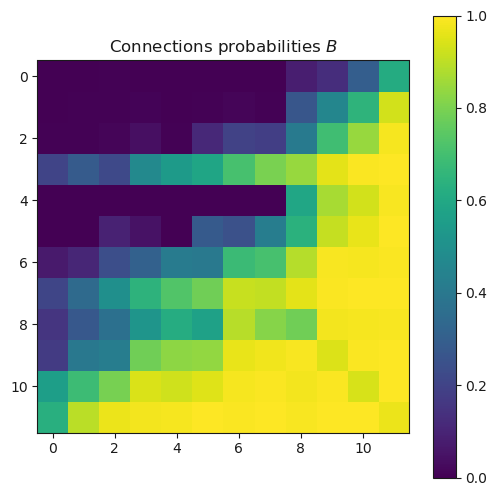

In [82]:
plt.figure(figsize=(6,6))
plt.title(r'Connections probabilities $B$', size=12)
ax = plt.imshow(q_B_mean.numpy()[nonempty_classes,:][:,nonempty_classes], cmap='viridis', vmin=0., vmax=1.)
plt.colorbar()
#plt.savefig('../examples/images/wt_B_sbm.pdf')plt.show()


The obtained results suggest that the SBM uses the node's degree as the main feature of a class. Therefore, the DCSBM may bring more insides in the latent structure of the network.

## DCSBM

Now, let us add the degree-correction. As befor we initialize $\delta$ with the observed degree distributions.

In [83]:
delta_init = torch.ones([N,2])
delta_mu = A_edges.sum(dim=1)/A_edges.sum(dim=1).mean()
delta_init[:,0]=delta_mu.log().clone()
print('Contains infinities:', bool(torch.isinf(delta_init).sum().item()))

Contains infinities: False


In [84]:
dataloader = DataLoader(EdgesDataset(A), batch_size=N*4, shuffle=True, num_workers=0)

vi = VI_DCSBM(num_nodes=N, num_classes=num_classes, 
                   priors={'theta_p':None, 
                           'B_p':None,
                           'delta_p':None},
                   init_values={'etas':None, 
                                'thetas':None, 
                                'Bs':None,
                                'deltas':delta_init})
vi.multi_train(dataloader, epochs=30, lrs = [0.1, 0.05, 0.01], trials=50)

>>>>>>> Training iteration #1 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 26170.83 | Epoch time 2.29
Epoch 2 | LR: 0.10 | Total loss: 19002.69 | Epoch time 2.22
Epoch 3 | LR: 0.10 | Total loss: 17266.82 | Epoch time 2.21
Epoch 4 | LR: 0.10 | Total loss: 16430.58 | Epoch time 2.27
Epoch 5 | LR: 0.10 | Total loss: 15903.07 | Epoch time 2.29
Epoch 6 | LR: 0.10 | Total loss: 15552.83 | Epoch time 1.92
Epoch 7 | LR: 0.10 | Total loss: 15276.88 | Epoch time 2.08
Epoch 8 | LR: 0.10 | Total loss: 15074.88 | Epoch time 2.22
Epoch 9 | LR: 0.10 | Total loss: 14911.03 | Epoch time 3.29
Epoch 10 | LR: 0.10 | Total loss: 14783.52 | Epoch time 2.36
Epoch 11 | LR: 0.10 | Total loss: 14682.41 | Epoch time 3.22
Epoch 12 | LR: 0.10 | Total loss: 14588.42 | Epoch time 3.36
Epoch 13 | LR: 0.10 | Total loss: 14516.15 | Epoch time 2.78
Epoch 14 | LR: 0.10 | Total loss: 14447.55 | Epoch time 2.14
Epoch 15 | LR: 0.10 | Total loss: 14393.38 | Epoch time 3.43
Epoch 16 | LR: 0.10 | Total los

Epoch 43 | LR: 0.05 | Total loss: 13354.92 | Epoch time 3.68
Epoch 44 | LR: 0.05 | Total loss: 13337.56 | Epoch time 3.68
Epoch 45 | LR: 0.05 | Total loss: 13321.59 | Epoch time 3.51
Epoch 46 | LR: 0.05 | Total loss: 13305.08 | Epoch time 4.10
Epoch 47 | LR: 0.05 | Total loss: 13296.41 | Epoch time 3.55
Epoch 48 | LR: 0.05 | Total loss: 13279.56 | Epoch time 3.68
Epoch 49 | LR: 0.05 | Total loss: 13278.28 | Epoch time 3.62
Epoch 50 | LR: 0.05 | Total loss: 13273.14 | Epoch time 3.68
Epoch 51 | LR: 0.05 | Total loss: 13251.10 | Epoch time 3.39
Epoch 52 | LR: 0.05 | Total loss: 13248.25 | Epoch time 3.76
Epoch 53 | LR: 0.05 | Total loss: 13235.48 | Epoch time 3.65
Epoch 54 | LR: 0.05 | Total loss: 13227.49 | Epoch time 3.66
Epoch 55 | LR: 0.05 | Total loss: 13214.41 | Epoch time 3.97
Epoch 56 | LR: 0.05 | Total loss: 13209.46 | Epoch time 3.83
Epoch 57 | LR: 0.05 | Total loss: 13197.12 | Epoch time 3.73
Epoch 58 | LR: 0.05 | Total loss: 13187.00 | Epoch time 3.58
Epoch 59 | LR: 0.05 | To

Epoch 86 | LR: 0.01 | Total loss: 12695.16 | Epoch time 3.78
Epoch 87 | LR: 0.01 | Total loss: 12694.40 | Epoch time 3.63
Epoch 88 | LR: 0.01 | Total loss: 12690.98 | Epoch time 4.07
Epoch 89 | LR: 0.01 | Total loss: 12681.46 | Epoch time 3.52
Epoch 90 | LR: 0.01 | Total loss: 12678.50 | Epoch time 3.62
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #4 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 19814.53 | Epoch time 3.74
Epoch 2 | LR: 0.10 | Total loss: 15978.91 | Epoch time 3.44
Epoch 3 | LR: 0.10 | Total loss: 15219.81 | Epoch time 3.70
Epoch 4 | LR: 0.10 | Total loss: 14931.43 | Epoch time 3.67
Epoch 5 | LR: 0.10 | Total loss: 14766.72 | Epoch time 3.45
Epoch 6 | LR: 0.10 | Total loss: 14657.19 | Epoch time 3.38
Epoch 7 | LR: 0.10 | Total loss: 14564.91 | Epoch time 3.59
Epoch 8 | LR: 0.10 | Total loss: 14493.93 | Epoch time 3.79
Epoch 9 | LR: 0.10 | Total loss: 14425.84 | Epoch time 3.68
Epoch 10 | LR: 0.10 | Total loss: 14375.21 | Epoch time 

Epoch 38 | LR: 0.05 | Total loss: 13212.74 | Epoch time 3.69
Epoch 39 | LR: 0.05 | Total loss: 13196.63 | Epoch time 3.85
Epoch 40 | LR: 0.05 | Total loss: 13180.67 | Epoch time 3.59
Epoch 41 | LR: 0.05 | Total loss: 13172.56 | Epoch time 3.67
Epoch 42 | LR: 0.05 | Total loss: 13160.86 | Epoch time 3.64
Epoch 43 | LR: 0.05 | Total loss: 13144.38 | Epoch time 3.53
Epoch 44 | LR: 0.05 | Total loss: 13135.20 | Epoch time 3.38
Epoch 45 | LR: 0.05 | Total loss: 13116.10 | Epoch time 3.76
Epoch 46 | LR: 0.05 | Total loss: 13116.47 | Epoch time 3.88
Epoch 47 | LR: 0.05 | Total loss: 13101.43 | Epoch time 3.23
Epoch 48 | LR: 0.05 | Total loss: 13093.42 | Epoch time 3.61
Epoch 49 | LR: 0.05 | Total loss: 13088.32 | Epoch time 3.73
Epoch 50 | LR: 0.05 | Total loss: 13077.79 | Epoch time 3.53
Epoch 51 | LR: 0.05 | Total loss: 13064.91 | Epoch time 3.85
Epoch 52 | LR: 0.05 | Total loss: 13058.04 | Epoch time 3.67
Epoch 53 | LR: 0.05 | Total loss: 13049.94 | Epoch time 3.32
Epoch 54 | LR: 0.05 | To

Epoch 81 | LR: 0.01 | Total loss: 12489.32 | Epoch time 4.75
Epoch 82 | LR: 0.01 | Total loss: 12482.73 | Epoch time 4.41
Epoch 83 | LR: 0.01 | Total loss: 12479.21 | Epoch time 3.23
Epoch 84 | LR: 0.01 | Total loss: 12480.23 | Epoch time 2.43
Epoch 85 | LR: 0.01 | Total loss: 12475.69 | Epoch time 3.12
Epoch 86 | LR: 0.01 | Total loss: 12475.38 | Epoch time 2.84
Epoch 87 | LR: 0.01 | Total loss: 12474.19 | Epoch time 4.16
Epoch 88 | LR: 0.01 | Total loss: 12473.84 | Epoch time 3.42
Epoch 89 | LR: 0.01 | Total loss: 12472.45 | Epoch time 3.79
Epoch 90 | LR: 0.01 | Total loss: 12473.01 | Epoch time 4.34
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #7 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 19572.18 | Epoch time 4.71
Epoch 2 | LR: 0.10 | Total loss: 15997.05 | Epoch time 3.82
Epoch 3 | LR: 0.10 | Total loss: 15266.83 | Epoch time 2.60
Epoch 4 | LR: 0.10 | Total loss: 14933.89 | Epoch time 2.29
Epoch 5 | LR: 0.10 | Total loss: 14753.35 | Epoch t

Epoch 33 | LR: 0.05 | Total loss: 13567.33 | Epoch time 3.62
Epoch 34 | LR: 0.05 | Total loss: 13541.91 | Epoch time 3.67
Epoch 35 | LR: 0.05 | Total loss: 13526.36 | Epoch time 3.61
Epoch 36 | LR: 0.05 | Total loss: 13505.97 | Epoch time 3.50
Epoch 37 | LR: 0.05 | Total loss: 13489.68 | Epoch time 3.71
Epoch 38 | LR: 0.05 | Total loss: 13467.02 | Epoch time 3.44
Epoch 39 | LR: 0.05 | Total loss: 13453.96 | Epoch time 3.43
Epoch 40 | LR: 0.05 | Total loss: 13425.09 | Epoch time 3.48
Epoch 41 | LR: 0.05 | Total loss: 13407.43 | Epoch time 3.95
Epoch 42 | LR: 0.05 | Total loss: 13398.53 | Epoch time 3.40
Epoch 43 | LR: 0.05 | Total loss: 13378.93 | Epoch time 2.92
Epoch 44 | LR: 0.05 | Total loss: 13371.76 | Epoch time 3.58
Epoch 45 | LR: 0.05 | Total loss: 13354.17 | Epoch time 3.63
Epoch 46 | LR: 0.05 | Total loss: 13340.70 | Epoch time 2.39
Epoch 47 | LR: 0.05 | Total loss: 13325.90 | Epoch time 1.94
Epoch 48 | LR: 0.05 | Total loss: 13313.35 | Epoch time 1.85
Epoch 49 | LR: 0.05 | To

Epoch 76 | LR: 0.01 | Total loss: 12900.86 | Epoch time 1.94
Epoch 77 | LR: 0.01 | Total loss: 12902.38 | Epoch time 2.30
Epoch 78 | LR: 0.01 | Total loss: 12904.77 | Epoch time 2.29
Epoch 79 | LR: 0.01 | Total loss: 12900.51 | Epoch time 2.22
Epoch 80 | LR: 0.01 | Total loss: 12900.01 | Epoch time 1.94
Epoch 81 | LR: 0.01 | Total loss: 12895.13 | Epoch time 1.89
Epoch 82 | LR: 0.01 | Total loss: 12899.56 | Epoch time 1.93
Epoch 83 | LR: 0.01 | Total loss: 12895.92 | Epoch time 1.94
Epoch 84 | LR: 0.01 | Total loss: 12900.37 | Epoch time 1.88
Epoch 85 | LR: 0.01 | Total loss: 12896.18 | Epoch time 1.90
Epoch 86 | LR: 0.01 | Total loss: 12894.23 | Epoch time 1.89
Epoch 87 | LR: 0.01 | Total loss: 12892.11 | Epoch time 1.89
Epoch 88 | LR: 0.01 | Total loss: 12893.66 | Epoch time 1.91
Epoch 89 | LR: 0.01 | Total loss: 12897.04 | Epoch time 1.90
Epoch 90 | LR: 0.01 | Total loss: 12895.60 | Epoch time 1.88
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #10 

>>>>>>>>>>>> Sta

Epoch 28 | LR: 0.10 | Total loss: 13092.79 | Epoch time 1.76
Epoch 29 | LR: 0.10 | Total loss: 13042.01 | Epoch time 1.69
Epoch 30 | LR: 0.10 | Total loss: 13005.36 | Epoch time 1.70
Epoch 31 | LR: 0.05 | Total loss: 12970.84 | Epoch time 1.74
Epoch 32 | LR: 0.05 | Total loss: 12940.52 | Epoch time 1.75
Epoch 33 | LR: 0.05 | Total loss: 12914.79 | Epoch time 1.84
Epoch 34 | LR: 0.05 | Total loss: 12893.78 | Epoch time 2.24
Epoch 35 | LR: 0.05 | Total loss: 12877.92 | Epoch time 2.25
Epoch 36 | LR: 0.05 | Total loss: 12852.22 | Epoch time 2.18
Epoch 37 | LR: 0.05 | Total loss: 12827.12 | Epoch time 2.15
Epoch 38 | LR: 0.05 | Total loss: 12803.30 | Epoch time 2.15
Epoch 39 | LR: 0.05 | Total loss: 12790.81 | Epoch time 2.17
Epoch 40 | LR: 0.05 | Total loss: 12767.43 | Epoch time 2.02
Epoch 41 | LR: 0.05 | Total loss: 12749.18 | Epoch time 1.86
Epoch 42 | LR: 0.05 | Total loss: 12733.97 | Epoch time 1.70
Epoch 43 | LR: 0.05 | Total loss: 12718.34 | Epoch time 1.70
Epoch 44 | LR: 0.05 | To

Epoch 71 | LR: 0.01 | Total loss: 12885.77 | Epoch time 3.95
Epoch 72 | LR: 0.01 | Total loss: 12879.63 | Epoch time 2.98
Epoch 73 | LR: 0.01 | Total loss: 12884.30 | Epoch time 2.89
Epoch 74 | LR: 0.01 | Total loss: 12878.33 | Epoch time 3.08
Epoch 75 | LR: 0.01 | Total loss: 12875.71 | Epoch time 2.39
Epoch 76 | LR: 0.01 | Total loss: 12869.56 | Epoch time 2.14
Epoch 77 | LR: 0.01 | Total loss: 12868.68 | Epoch time 3.88
Epoch 78 | LR: 0.01 | Total loss: 12865.58 | Epoch time 2.91
Epoch 79 | LR: 0.01 | Total loss: 12861.82 | Epoch time 2.90
Epoch 80 | LR: 0.01 | Total loss: 12859.24 | Epoch time 3.39
Epoch 81 | LR: 0.01 | Total loss: 12852.39 | Epoch time 2.39
Epoch 82 | LR: 0.01 | Total loss: 12843.91 | Epoch time 2.40
Epoch 83 | LR: 0.01 | Total loss: 12846.35 | Epoch time 2.45
Epoch 84 | LR: 0.01 | Total loss: 12839.83 | Epoch time 2.10
Epoch 85 | LR: 0.01 | Total loss: 12840.45 | Epoch time 2.41
Epoch 86 | LR: 0.01 | Total loss: 12840.33 | Epoch time 2.33
Epoch 87 | LR: 0.01 | To

Epoch 23 | LR: 0.10 | Total loss: 13877.49 | Epoch time 2.45
Epoch 24 | LR: 0.10 | Total loss: 13791.70 | Epoch time 2.52
Epoch 25 | LR: 0.10 | Total loss: 13706.40 | Epoch time 2.49
Epoch 26 | LR: 0.10 | Total loss: 13616.21 | Epoch time 2.44
Epoch 27 | LR: 0.10 | Total loss: 13527.99 | Epoch time 2.11
Epoch 28 | LR: 0.10 | Total loss: 13448.41 | Epoch time 2.12
Epoch 29 | LR: 0.10 | Total loss: 13363.85 | Epoch time 2.39
Epoch 30 | LR: 0.10 | Total loss: 13308.19 | Epoch time 2.31
Epoch 31 | LR: 0.05 | Total loss: 13256.10 | Epoch time 2.19
Epoch 32 | LR: 0.05 | Total loss: 13201.08 | Epoch time 2.65
Epoch 33 | LR: 0.05 | Total loss: 13157.26 | Epoch time 1.95
Epoch 34 | LR: 0.05 | Total loss: 13131.35 | Epoch time 1.94
Epoch 35 | LR: 0.05 | Total loss: 13105.97 | Epoch time 1.92
Epoch 36 | LR: 0.05 | Total loss: 13085.97 | Epoch time 1.90
Epoch 37 | LR: 0.05 | Total loss: 13058.98 | Epoch time 2.02
Epoch 38 | LR: 0.05 | Total loss: 13049.91 | Epoch time 1.92
Epoch 39 | LR: 0.05 | To

Epoch 66 | LR: 0.01 | Total loss: 12910.16 | Epoch time 2.36
Epoch 67 | LR: 0.01 | Total loss: 12905.48 | Epoch time 1.98
Epoch 68 | LR: 0.01 | Total loss: 12908.42 | Epoch time 1.89
Epoch 69 | LR: 0.01 | Total loss: 12910.79 | Epoch time 1.87
Epoch 70 | LR: 0.01 | Total loss: 12906.03 | Epoch time 1.88
Epoch 71 | LR: 0.01 | Total loss: 12907.38 | Epoch time 1.86
Epoch 72 | LR: 0.01 | Total loss: 12910.83 | Epoch time 1.91
Epoch 73 | LR: 0.01 | Total loss: 12905.86 | Epoch time 1.93
Epoch 74 | LR: 0.01 | Total loss: 12905.43 | Epoch time 1.91
Epoch 75 | LR: 0.01 | Total loss: 12894.54 | Epoch time 1.91
Epoch 76 | LR: 0.01 | Total loss: 12903.71 | Epoch time 1.89
Epoch 77 | LR: 0.01 | Total loss: 12903.53 | Epoch time 1.96
Epoch 78 | LR: 0.01 | Total loss: 12894.54 | Epoch time 2.21
Epoch 79 | LR: 0.01 | Total loss: 12901.54 | Epoch time 2.29
Epoch 80 | LR: 0.01 | Total loss: 12901.96 | Epoch time 2.27
Epoch 81 | LR: 0.01 | Total loss: 12898.34 | Epoch time 2.08
Epoch 82 | LR: 0.01 | To

Epoch 18 | LR: 0.10 | Total loss: 13785.24 | Epoch time 1.66
Epoch 19 | LR: 0.10 | Total loss: 13690.79 | Epoch time 1.63
Epoch 20 | LR: 0.10 | Total loss: 13593.66 | Epoch time 1.65
Epoch 21 | LR: 0.10 | Total loss: 13485.37 | Epoch time 1.71
Epoch 22 | LR: 0.10 | Total loss: 13388.99 | Epoch time 1.67
Epoch 23 | LR: 0.10 | Total loss: 13287.88 | Epoch time 1.71
Epoch 24 | LR: 0.10 | Total loss: 13207.28 | Epoch time 1.69
Epoch 25 | LR: 0.10 | Total loss: 13137.77 | Epoch time 1.70
Epoch 26 | LR: 0.10 | Total loss: 13073.64 | Epoch time 1.70
Epoch 27 | LR: 0.10 | Total loss: 13019.83 | Epoch time 1.68
Epoch 28 | LR: 0.10 | Total loss: 12977.79 | Epoch time 1.64
Epoch 29 | LR: 0.10 | Total loss: 12930.24 | Epoch time 1.68
Epoch 30 | LR: 0.10 | Total loss: 12904.70 | Epoch time 1.69
Epoch 31 | LR: 0.05 | Total loss: 12873.39 | Epoch time 1.64
Epoch 32 | LR: 0.05 | Total loss: 12846.43 | Epoch time 1.68
Epoch 33 | LR: 0.05 | Total loss: 12825.87 | Epoch time 1.74
Epoch 34 | LR: 0.05 | To

Epoch 61 | LR: 0.01 | Total loss: 12976.79 | Epoch time 1.71
Epoch 62 | LR: 0.01 | Total loss: 12965.79 | Epoch time 1.73
Epoch 63 | LR: 0.01 | Total loss: 12968.85 | Epoch time 1.70
Epoch 64 | LR: 0.01 | Total loss: 12963.34 | Epoch time 1.72
Epoch 65 | LR: 0.01 | Total loss: 12959.63 | Epoch time 1.72
Epoch 66 | LR: 0.01 | Total loss: 12966.80 | Epoch time 1.71
Epoch 67 | LR: 0.01 | Total loss: 12962.36 | Epoch time 1.73
Epoch 68 | LR: 0.01 | Total loss: 12963.56 | Epoch time 1.73
Epoch 69 | LR: 0.01 | Total loss: 12961.71 | Epoch time 1.79
Epoch 70 | LR: 0.01 | Total loss: 12955.93 | Epoch time 1.75
Epoch 71 | LR: 0.01 | Total loss: 12962.22 | Epoch time 1.75
Epoch 72 | LR: 0.01 | Total loss: 12953.89 | Epoch time 1.89
Epoch 73 | LR: 0.01 | Total loss: 12949.94 | Epoch time 1.69
Epoch 74 | LR: 0.01 | Total loss: 12953.90 | Epoch time 1.97
Epoch 75 | LR: 0.01 | Total loss: 12952.14 | Epoch time 1.70
Epoch 76 | LR: 0.01 | Total loss: 12945.76 | Epoch time 1.68
Epoch 77 | LR: 0.01 | To

Epoch 13 | LR: 0.10 | Total loss: 14301.12 | Epoch time 1.96
Epoch 14 | LR: 0.10 | Total loss: 14260.33 | Epoch time 1.85
Epoch 15 | LR: 0.10 | Total loss: 14212.95 | Epoch time 1.85
Epoch 16 | LR: 0.10 | Total loss: 14160.43 | Epoch time 1.85
Epoch 17 | LR: 0.10 | Total loss: 14100.37 | Epoch time 1.85
Epoch 18 | LR: 0.10 | Total loss: 14037.25 | Epoch time 1.86
Epoch 19 | LR: 0.10 | Total loss: 13966.40 | Epoch time 2.18
Epoch 20 | LR: 0.10 | Total loss: 13901.14 | Epoch time 2.13
Epoch 21 | LR: 0.10 | Total loss: 13814.35 | Epoch time 2.25
Epoch 22 | LR: 0.10 | Total loss: 13727.25 | Epoch time 2.32
Epoch 23 | LR: 0.10 | Total loss: 13636.79 | Epoch time 2.12
Epoch 24 | LR: 0.10 | Total loss: 13557.62 | Epoch time 1.88
Epoch 25 | LR: 0.10 | Total loss: 13478.21 | Epoch time 1.86
Epoch 26 | LR: 0.10 | Total loss: 13409.81 | Epoch time 1.85
Epoch 27 | LR: 0.10 | Total loss: 13348.97 | Epoch time 1.86
Epoch 28 | LR: 0.10 | Total loss: 13314.25 | Epoch time 1.93
Epoch 29 | LR: 0.10 | To

Epoch 56 | LR: 0.05 | Total loss: 12940.90 | Epoch time 1.89
Epoch 57 | LR: 0.05 | Total loss: 12937.14 | Epoch time 1.88
Epoch 58 | LR: 0.05 | Total loss: 12938.28 | Epoch time 2.03
Epoch 59 | LR: 0.05 | Total loss: 12927.45 | Epoch time 1.91
Epoch 60 | LR: 0.05 | Total loss: 12923.60 | Epoch time 1.88
Epoch 61 | LR: 0.01 | Total loss: 12919.59 | Epoch time 2.37
Epoch 62 | LR: 0.01 | Total loss: 12918.43 | Epoch time 2.21
Epoch 63 | LR: 0.01 | Total loss: 12912.71 | Epoch time 1.90
Epoch 64 | LR: 0.01 | Total loss: 12905.18 | Epoch time 2.07
Epoch 65 | LR: 0.01 | Total loss: 12904.42 | Epoch time 2.28
Epoch 66 | LR: 0.01 | Total loss: 12899.14 | Epoch time 2.34
Epoch 67 | LR: 0.01 | Total loss: 12893.39 | Epoch time 2.38
Epoch 68 | LR: 0.01 | Total loss: 12866.55 | Epoch time 2.36
Epoch 69 | LR: 0.01 | Total loss: 12859.57 | Epoch time 2.38
Epoch 70 | LR: 0.01 | Total loss: 12856.24 | Epoch time 2.23
Epoch 71 | LR: 0.01 | Total loss: 12834.51 | Epoch time 2.22
Epoch 72 | LR: 0.01 | To

Epoch 8 | LR: 0.10 | Total loss: 14521.31 | Epoch time 3.76
Epoch 9 | LR: 0.10 | Total loss: 14428.59 | Epoch time 3.61
Epoch 10 | LR: 0.10 | Total loss: 14348.50 | Epoch time 3.79
Epoch 11 | LR: 0.10 | Total loss: 14257.48 | Epoch time 3.75
Epoch 12 | LR: 0.10 | Total loss: 14178.71 | Epoch time 3.61
Epoch 13 | LR: 0.10 | Total loss: 14089.97 | Epoch time 3.78
Epoch 14 | LR: 0.10 | Total loss: 14009.32 | Epoch time 3.87
Epoch 15 | LR: 0.10 | Total loss: 13920.65 | Epoch time 3.84
Epoch 16 | LR: 0.10 | Total loss: 13823.96 | Epoch time 3.84
Epoch 17 | LR: 0.10 | Total loss: 13724.64 | Epoch time 3.97
Epoch 18 | LR: 0.10 | Total loss: 13625.29 | Epoch time 3.67
Epoch 19 | LR: 0.10 | Total loss: 13502.29 | Epoch time 4.11
Epoch 20 | LR: 0.10 | Total loss: 13373.99 | Epoch time 3.48
Epoch 21 | LR: 0.10 | Total loss: 13259.77 | Epoch time 3.66
Epoch 22 | LR: 0.10 | Total loss: 13150.32 | Epoch time 3.73
Epoch 23 | LR: 0.10 | Total loss: 13059.86 | Epoch time 3.87
Epoch 24 | LR: 0.10 | Tota

Epoch 51 | LR: 0.05 | Total loss: 12584.44 | Epoch time 3.53
Epoch 52 | LR: 0.05 | Total loss: 12573.00 | Epoch time 3.39
Epoch 53 | LR: 0.05 | Total loss: 12563.20 | Epoch time 3.75
Epoch 54 | LR: 0.05 | Total loss: 12561.54 | Epoch time 3.92
Epoch 55 | LR: 0.05 | Total loss: 12554.87 | Epoch time 3.95
Epoch 56 | LR: 0.05 | Total loss: 12542.33 | Epoch time 3.66
Epoch 57 | LR: 0.05 | Total loss: 12543.79 | Epoch time 3.79
Epoch 58 | LR: 0.05 | Total loss: 12538.78 | Epoch time 4.85
Epoch 59 | LR: 0.05 | Total loss: 12533.26 | Epoch time 5.98
Epoch 60 | LR: 0.05 | Total loss: 12536.19 | Epoch time 2.64
Epoch 61 | LR: 0.01 | Total loss: 12533.99 | Epoch time 2.08
Epoch 62 | LR: 0.01 | Total loss: 12536.10 | Epoch time 2.84
Epoch 63 | LR: 0.01 | Total loss: 12530.68 | Epoch time 2.61
Epoch 64 | LR: 0.01 | Total loss: 12522.89 | Epoch time 3.24
Epoch 65 | LR: 0.01 | Total loss: 12524.26 | Epoch time 2.40
Epoch 66 | LR: 0.01 | Total loss: 12527.99 | Epoch time 2.81
Epoch 67 | LR: 0.01 | To

Epoch 3 | LR: 0.10 | Total loss: 15265.34 | Epoch time 3.58
Epoch 4 | LR: 0.10 | Total loss: 14964.97 | Epoch time 3.87
Epoch 5 | LR: 0.10 | Total loss: 14780.32 | Epoch time 3.73
Epoch 6 | LR: 0.10 | Total loss: 14657.93 | Epoch time 3.55
Epoch 7 | LR: 0.10 | Total loss: 14560.58 | Epoch time 3.30
Epoch 8 | LR: 0.10 | Total loss: 14488.38 | Epoch time 3.80
Epoch 9 | LR: 0.10 | Total loss: 14422.96 | Epoch time 3.60
Epoch 10 | LR: 0.10 | Total loss: 14355.25 | Epoch time 3.19
Epoch 11 | LR: 0.10 | Total loss: 14302.91 | Epoch time 3.62
Epoch 12 | LR: 0.10 | Total loss: 14245.24 | Epoch time 3.78
Epoch 13 | LR: 0.10 | Total loss: 14182.29 | Epoch time 3.28
Epoch 14 | LR: 0.10 | Total loss: 14129.58 | Epoch time 3.41
Epoch 15 | LR: 0.10 | Total loss: 14074.93 | Epoch time 3.41
Epoch 16 | LR: 0.10 | Total loss: 14032.27 | Epoch time 3.61
Epoch 17 | LR: 0.10 | Total loss: 13992.44 | Epoch time 3.26
Epoch 18 | LR: 0.10 | Total loss: 13949.40 | Epoch time 3.48
Epoch 19 | LR: 0.10 | Total los

Epoch 46 | LR: 0.05 | Total loss: 12803.19 | Epoch time 4.04
Epoch 47 | LR: 0.05 | Total loss: 12783.32 | Epoch time 3.55
Epoch 48 | LR: 0.05 | Total loss: 12757.84 | Epoch time 3.65
Epoch 49 | LR: 0.05 | Total loss: 12739.43 | Epoch time 3.80
Epoch 50 | LR: 0.05 | Total loss: 12719.85 | Epoch time 4.00
Epoch 51 | LR: 0.05 | Total loss: 12714.73 | Epoch time 3.59
Epoch 52 | LR: 0.05 | Total loss: 12688.48 | Epoch time 3.41
Epoch 53 | LR: 0.05 | Total loss: 12679.60 | Epoch time 3.62
Epoch 54 | LR: 0.05 | Total loss: 12667.05 | Epoch time 3.76
Epoch 55 | LR: 0.05 | Total loss: 12652.69 | Epoch time 3.86
Epoch 56 | LR: 0.05 | Total loss: 12640.65 | Epoch time 3.53
Epoch 57 | LR: 0.05 | Total loss: 12632.78 | Epoch time 3.62
Epoch 58 | LR: 0.05 | Total loss: 12629.70 | Epoch time 3.66
Epoch 59 | LR: 0.05 | Total loss: 12620.71 | Epoch time 3.81
Epoch 60 | LR: 0.05 | Total loss: 12617.17 | Epoch time 3.84
Epoch 61 | LR: 0.01 | Total loss: 12607.21 | Epoch time 3.35
Epoch 62 | LR: 0.01 | To

Epoch 89 | LR: 0.01 | Total loss: 12541.56 | Epoch time 1.72
Epoch 90 | LR: 0.01 | Total loss: 12542.12 | Epoch time 1.70
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #29 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 19480.18 | Epoch time 1.74
Epoch 2 | LR: 0.10 | Total loss: 15845.12 | Epoch time 2.12
Epoch 3 | LR: 0.10 | Total loss: 15145.13 | Epoch time 2.22
Epoch 4 | LR: 0.10 | Total loss: 14878.03 | Epoch time 2.03
Epoch 5 | LR: 0.10 | Total loss: 14723.07 | Epoch time 1.91
Epoch 6 | LR: 0.10 | Total loss: 14624.62 | Epoch time 1.74
Epoch 7 | LR: 0.10 | Total loss: 14539.17 | Epoch time 2.12
Epoch 8 | LR: 0.10 | Total loss: 14470.89 | Epoch time 2.33
Epoch 9 | LR: 0.10 | Total loss: 14421.89 | Epoch time 2.28
Epoch 10 | LR: 0.10 | Total loss: 14368.95 | Epoch time 2.24
Epoch 11 | LR: 0.10 | Total loss: 14327.53 | Epoch time 2.22
Epoch 12 | LR: 0.10 | Total loss: 14295.54 | Epoch time 1.79
Epoch 13 | LR: 0.10 | Total loss: 14265.23 | Epoch time

Epoch 41 | LR: 0.05 | Total loss: 12711.20 | Epoch time 1.86
Epoch 42 | LR: 0.05 | Total loss: 12696.30 | Epoch time 1.84
Epoch 43 | LR: 0.05 | Total loss: 12694.27 | Epoch time 1.84
Epoch 44 | LR: 0.05 | Total loss: 12682.14 | Epoch time 1.97
Epoch 45 | LR: 0.05 | Total loss: 12675.44 | Epoch time 1.88
Epoch 46 | LR: 0.05 | Total loss: 12661.18 | Epoch time 1.90
Epoch 47 | LR: 0.05 | Total loss: 12652.74 | Epoch time 1.92
Epoch 48 | LR: 0.05 | Total loss: 12638.41 | Epoch time 1.89
Epoch 49 | LR: 0.05 | Total loss: 12644.11 | Epoch time 1.86
Epoch 50 | LR: 0.05 | Total loss: 12633.25 | Epoch time 1.92
Epoch 51 | LR: 0.05 | Total loss: 12620.24 | Epoch time 1.84
Epoch 52 | LR: 0.05 | Total loss: 12610.53 | Epoch time 2.38
Epoch 53 | LR: 0.05 | Total loss: 12610.71 | Epoch time 2.14
Epoch 54 | LR: 0.05 | Total loss: 12601.11 | Epoch time 1.70
Epoch 55 | LR: 0.05 | Total loss: 12600.89 | Epoch time 1.72
Epoch 56 | LR: 0.05 | Total loss: 12585.63 | Epoch time 1.69
Epoch 57 | LR: 0.05 | To

Epoch 84 | LR: 0.01 | Total loss: 12880.07 | Epoch time 2.23
Epoch 85 | LR: 0.01 | Total loss: 12878.44 | Epoch time 2.32
Epoch 86 | LR: 0.01 | Total loss: 12873.56 | Epoch time 2.64
Epoch 87 | LR: 0.01 | Total loss: 12872.06 | Epoch time 1.87
Epoch 88 | LR: 0.01 | Total loss: 12878.97 | Epoch time 1.91
Epoch 89 | LR: 0.01 | Total loss: 12868.35 | Epoch time 2.26
Epoch 90 | LR: 0.01 | Total loss: 12875.64 | Epoch time 2.30
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #32 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 19852.98 | Epoch time 2.23
Epoch 2 | LR: 0.10 | Total loss: 16150.46 | Epoch time 2.02
Epoch 3 | LR: 0.10 | Total loss: 15370.71 | Epoch time 2.31
Epoch 4 | LR: 0.10 | Total loss: 15007.23 | Epoch time 2.34
Epoch 5 | LR: 0.10 | Total loss: 14815.01 | Epoch time 1.97
Epoch 6 | LR: 0.10 | Total loss: 14686.05 | Epoch time 1.87
Epoch 7 | LR: 0.10 | Total loss: 14585.15 | Epoch time 1.84
Epoch 8 | LR: 0.10 | Total loss: 14504.87 | Epoch tim

Epoch 36 | LR: 0.05 | Total loss: 13073.36 | Epoch time 2.00
Epoch 37 | LR: 0.05 | Total loss: 13059.37 | Epoch time 2.14
Epoch 38 | LR: 0.05 | Total loss: 13044.85 | Epoch time 2.02
Epoch 39 | LR: 0.05 | Total loss: 13040.95 | Epoch time 1.93
Epoch 40 | LR: 0.05 | Total loss: 13027.33 | Epoch time 2.03
Epoch 41 | LR: 0.05 | Total loss: 13020.12 | Epoch time 2.34
Epoch 42 | LR: 0.05 | Total loss: 13021.77 | Epoch time 2.30
Epoch 43 | LR: 0.05 | Total loss: 13017.74 | Epoch time 2.26
Epoch 44 | LR: 0.05 | Total loss: 13001.05 | Epoch time 2.28
Epoch 45 | LR: 0.05 | Total loss: 13002.63 | Epoch time 2.31
Epoch 46 | LR: 0.05 | Total loss: 12990.38 | Epoch time 2.24
Epoch 47 | LR: 0.05 | Total loss: 12984.99 | Epoch time 2.33
Epoch 48 | LR: 0.05 | Total loss: 12972.12 | Epoch time 2.13
Epoch 49 | LR: 0.05 | Total loss: 12971.49 | Epoch time 1.99
Epoch 50 | LR: 0.05 | Total loss: 12973.63 | Epoch time 1.88
Epoch 51 | LR: 0.05 | Total loss: 12963.98 | Epoch time 1.91
Epoch 52 | LR: 0.05 | To

Epoch 79 | LR: 0.01 | Total loss: 12829.44 | Epoch time 2.68
Epoch 80 | LR: 0.01 | Total loss: 12828.53 | Epoch time 5.43
Epoch 81 | LR: 0.01 | Total loss: 12822.85 | Epoch time 6.34
Epoch 82 | LR: 0.01 | Total loss: 12826.56 | Epoch time 4.00
Epoch 83 | LR: 0.01 | Total loss: 12818.66 | Epoch time 2.95
Epoch 84 | LR: 0.01 | Total loss: 12814.23 | Epoch time 2.86
Epoch 85 | LR: 0.01 | Total loss: 12813.71 | Epoch time 2.57
Epoch 86 | LR: 0.01 | Total loss: 12808.63 | Epoch time 2.33
Epoch 87 | LR: 0.01 | Total loss: 12807.38 | Epoch time 2.87
Epoch 88 | LR: 0.01 | Total loss: 12811.37 | Epoch time 2.37
Epoch 89 | LR: 0.01 | Total loss: 12806.19 | Epoch time 2.16
Epoch 90 | LR: 0.01 | Total loss: 12808.21 | Epoch time 3.21
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #35 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 20030.68 | Epoch time 3.01
Epoch 2 | LR: 0.10 | Total loss: 16173.36 | Epoch time 2.59
Epoch 3 | LR: 0.10 | Total loss: 15351.93 | Epoc

Epoch 31 | LR: 0.05 | Total loss: 12906.12 | Epoch time 4.79
Epoch 32 | LR: 0.05 | Total loss: 12869.08 | Epoch time 2.36
Epoch 33 | LR: 0.05 | Total loss: 12848.85 | Epoch time 2.28
Epoch 34 | LR: 0.05 | Total loss: 12817.68 | Epoch time 2.53
Epoch 35 | LR: 0.05 | Total loss: 12794.65 | Epoch time 2.30
Epoch 36 | LR: 0.05 | Total loss: 12778.49 | Epoch time 2.08
Epoch 37 | LR: 0.05 | Total loss: 12765.85 | Epoch time 2.48
Epoch 38 | LR: 0.05 | Total loss: 12745.10 | Epoch time 3.00
Epoch 39 | LR: 0.05 | Total loss: 12739.17 | Epoch time 2.25
Epoch 40 | LR: 0.05 | Total loss: 12726.79 | Epoch time 2.01
Epoch 41 | LR: 0.05 | Total loss: 12720.58 | Epoch time 2.26
Epoch 42 | LR: 0.05 | Total loss: 12708.02 | Epoch time 2.52
Epoch 43 | LR: 0.05 | Total loss: 12699.43 | Epoch time 5.03
Epoch 44 | LR: 0.05 | Total loss: 12692.57 | Epoch time 2.71
Epoch 45 | LR: 0.05 | Total loss: 12687.35 | Epoch time 3.07
Epoch 46 | LR: 0.05 | Total loss: 12681.40 | Epoch time 2.44
Epoch 47 | LR: 0.05 | To

Epoch 74 | LR: 0.01 | Total loss: 13271.75 | Epoch time 3.01
Epoch 75 | LR: 0.01 | Total loss: 13263.50 | Epoch time 2.68
Epoch 76 | LR: 0.01 | Total loss: 13250.38 | Epoch time 2.42
Epoch 77 | LR: 0.01 | Total loss: 13241.48 | Epoch time 2.48
Epoch 78 | LR: 0.01 | Total loss: 13229.90 | Epoch time 3.04
Epoch 79 | LR: 0.01 | Total loss: 13219.51 | Epoch time 5.11
Epoch 80 | LR: 0.01 | Total loss: 13207.29 | Epoch time 4.96
Epoch 81 | LR: 0.01 | Total loss: 13196.27 | Epoch time 5.84
Epoch 82 | LR: 0.01 | Total loss: 13188.44 | Epoch time 3.40
Epoch 83 | LR: 0.01 | Total loss: 13169.85 | Epoch time 3.26
Epoch 84 | LR: 0.01 | Total loss: 13166.12 | Epoch time 2.50
Epoch 85 | LR: 0.01 | Total loss: 13156.44 | Epoch time 2.64
Epoch 86 | LR: 0.01 | Total loss: 13146.65 | Epoch time 3.00
Epoch 87 | LR: 0.01 | Total loss: 13138.09 | Epoch time 2.53
Epoch 88 | LR: 0.01 | Total loss: 13132.15 | Epoch time 2.82
Epoch 89 | LR: 0.01 | Total loss: 13128.85 | Epoch time 2.38
Epoch 90 | LR: 0.01 | To

Epoch 26 | LR: 0.10 | Total loss: 13437.65 | Epoch time 2.31
Epoch 27 | LR: 0.10 | Total loss: 13391.45 | Epoch time 2.68
Epoch 28 | LR: 0.10 | Total loss: 13340.08 | Epoch time 2.88
Epoch 29 | LR: 0.10 | Total loss: 13286.96 | Epoch time 3.50
Epoch 30 | LR: 0.10 | Total loss: 13265.71 | Epoch time 1.82
Epoch 31 | LR: 0.05 | Total loss: 13224.05 | Epoch time 3.14
Epoch 32 | LR: 0.05 | Total loss: 13199.50 | Epoch time 2.11
Epoch 33 | LR: 0.05 | Total loss: 13180.12 | Epoch time 2.73
Epoch 34 | LR: 0.05 | Total loss: 13159.44 | Epoch time 3.05
Epoch 35 | LR: 0.05 | Total loss: 13142.46 | Epoch time 3.30
Epoch 36 | LR: 0.05 | Total loss: 13128.50 | Epoch time 3.03
Epoch 37 | LR: 0.05 | Total loss: 13114.60 | Epoch time 2.38
Epoch 38 | LR: 0.05 | Total loss: 13099.39 | Epoch time 2.36
Epoch 39 | LR: 0.05 | Total loss: 13091.04 | Epoch time 2.05
Epoch 40 | LR: 0.05 | Total loss: 13082.53 | Epoch time 2.00
Epoch 41 | LR: 0.05 | Total loss: 13076.45 | Epoch time 2.22
Epoch 42 | LR: 0.05 | To

Epoch 69 | LR: 0.01 | Total loss: 12942.96 | Epoch time 2.07
Epoch 70 | LR: 0.01 | Total loss: 12933.45 | Epoch time 2.54
Epoch 71 | LR: 0.01 | Total loss: 12933.22 | Epoch time 3.56
Epoch 72 | LR: 0.01 | Total loss: 12923.74 | Epoch time 3.08
Epoch 73 | LR: 0.01 | Total loss: 12924.12 | Epoch time 3.61
Epoch 74 | LR: 0.01 | Total loss: 12916.69 | Epoch time 3.14
Epoch 75 | LR: 0.01 | Total loss: 12921.10 | Epoch time 3.20
Epoch 76 | LR: 0.01 | Total loss: 12911.42 | Epoch time 2.42
Epoch 77 | LR: 0.01 | Total loss: 12915.50 | Epoch time 2.62
Epoch 78 | LR: 0.01 | Total loss: 12907.51 | Epoch time 3.13
Epoch 79 | LR: 0.01 | Total loss: 12912.78 | Epoch time 3.03
Epoch 80 | LR: 0.01 | Total loss: 12901.80 | Epoch time 2.90
Epoch 81 | LR: 0.01 | Total loss: 12904.75 | Epoch time 2.34
Epoch 82 | LR: 0.01 | Total loss: 12904.45 | Epoch time 2.65
Epoch 83 | LR: 0.01 | Total loss: 12894.84 | Epoch time 2.54
Epoch 84 | LR: 0.01 | Total loss: 12895.65 | Epoch time 2.68
Epoch 85 | LR: 0.01 | To

Epoch 21 | LR: 0.10 | Total loss: 13683.51 | Epoch time 2.44
Epoch 22 | LR: 0.10 | Total loss: 13631.79 | Epoch time 2.53
Epoch 23 | LR: 0.10 | Total loss: 13584.65 | Epoch time 2.61
Epoch 24 | LR: 0.10 | Total loss: 13539.18 | Epoch time 2.67
Epoch 25 | LR: 0.10 | Total loss: 13497.95 | Epoch time 2.86
Epoch 26 | LR: 0.10 | Total loss: 13457.28 | Epoch time 2.45
Epoch 27 | LR: 0.10 | Total loss: 13428.54 | Epoch time 2.48
Epoch 28 | LR: 0.10 | Total loss: 13399.61 | Epoch time 2.42
Epoch 29 | LR: 0.10 | Total loss: 13372.69 | Epoch time 2.12
Epoch 30 | LR: 0.10 | Total loss: 13359.71 | Epoch time 2.14
Epoch 31 | LR: 0.05 | Total loss: 13332.68 | Epoch time 2.09
Epoch 32 | LR: 0.05 | Total loss: 13308.24 | Epoch time 1.95
Epoch 33 | LR: 0.05 | Total loss: 13292.65 | Epoch time 2.24
Epoch 34 | LR: 0.05 | Total loss: 13271.55 | Epoch time 2.24
Epoch 35 | LR: 0.05 | Total loss: 13258.29 | Epoch time 2.30
Epoch 36 | LR: 0.05 | Total loss: 13251.88 | Epoch time 2.47
Epoch 37 | LR: 0.05 | To

Epoch 64 | LR: 0.01 | Total loss: 12856.13 | Epoch time 2.77
Epoch 65 | LR: 0.01 | Total loss: 12848.50 | Epoch time 2.90
Epoch 66 | LR: 0.01 | Total loss: 12841.24 | Epoch time 2.64
Epoch 67 | LR: 0.01 | Total loss: 12827.53 | Epoch time 2.70
Epoch 68 | LR: 0.01 | Total loss: 12823.68 | Epoch time 2.35
Epoch 69 | LR: 0.01 | Total loss: 12823.83 | Epoch time 2.05
Epoch 70 | LR: 0.01 | Total loss: 12814.25 | Epoch time 2.11
Epoch 71 | LR: 0.01 | Total loss: 12816.75 | Epoch time 2.31
Epoch 72 | LR: 0.01 | Total loss: 12804.05 | Epoch time 2.01
Epoch 73 | LR: 0.01 | Total loss: 12796.32 | Epoch time 2.52
Epoch 74 | LR: 0.01 | Total loss: 12795.90 | Epoch time 2.75
Epoch 75 | LR: 0.01 | Total loss: 12788.40 | Epoch time 2.70
Epoch 76 | LR: 0.01 | Total loss: 12781.49 | Epoch time 2.56
Epoch 77 | LR: 0.01 | Total loss: 12780.04 | Epoch time 2.11
Epoch 78 | LR: 0.01 | Total loss: 12775.52 | Epoch time 2.42
Epoch 79 | LR: 0.01 | Total loss: 12765.38 | Epoch time 2.11
Epoch 80 | LR: 0.01 | To

Epoch 16 | LR: 0.10 | Total loss: 14152.17 | Epoch time 2.41
Epoch 17 | LR: 0.10 | Total loss: 14114.41 | Epoch time 2.24
Epoch 18 | LR: 0.10 | Total loss: 14068.51 | Epoch time 2.37
Epoch 19 | LR: 0.10 | Total loss: 14019.43 | Epoch time 2.50
Epoch 20 | LR: 0.10 | Total loss: 13963.68 | Epoch time 2.86
Epoch 21 | LR: 0.10 | Total loss: 13907.44 | Epoch time 2.65
Epoch 22 | LR: 0.10 | Total loss: 13847.86 | Epoch time 2.22
Epoch 23 | LR: 0.10 | Total loss: 13777.68 | Epoch time 2.53
Epoch 24 | LR: 0.10 | Total loss: 13714.09 | Epoch time 2.25
Epoch 25 | LR: 0.10 | Total loss: 13636.28 | Epoch time 2.57
Epoch 26 | LR: 0.10 | Total loss: 13573.23 | Epoch time 2.96
Epoch 27 | LR: 0.10 | Total loss: 13500.55 | Epoch time 2.93
Epoch 28 | LR: 0.10 | Total loss: 13441.16 | Epoch time 2.83
Epoch 29 | LR: 0.10 | Total loss: 13392.47 | Epoch time 2.36
Epoch 30 | LR: 0.10 | Total loss: 13344.35 | Epoch time 2.76
Epoch 31 | LR: 0.05 | Total loss: 13310.00 | Epoch time 2.15
Epoch 32 | LR: 0.05 | To

Epoch 59 | LR: 0.05 | Total loss: 12853.44 | Epoch time 1.94
Epoch 60 | LR: 0.05 | Total loss: 12846.54 | Epoch time 2.00
Epoch 61 | LR: 0.01 | Total loss: 12842.64 | Epoch time 1.99
Epoch 62 | LR: 0.01 | Total loss: 12829.31 | Epoch time 3.04
Epoch 63 | LR: 0.01 | Total loss: 12827.39 | Epoch time 2.35
Epoch 64 | LR: 0.01 | Total loss: 12810.94 | Epoch time 2.67
Epoch 65 | LR: 0.01 | Total loss: 12813.46 | Epoch time 2.95
Epoch 66 | LR: 0.01 | Total loss: 12802.80 | Epoch time 2.32
Epoch 67 | LR: 0.01 | Total loss: 12795.51 | Epoch time 2.11
Epoch 68 | LR: 0.01 | Total loss: 12799.66 | Epoch time 2.07
Epoch 69 | LR: 0.01 | Total loss: 12793.96 | Epoch time 2.50
Epoch 70 | LR: 0.01 | Total loss: 12784.21 | Epoch time 2.09
Epoch 71 | LR: 0.01 | Total loss: 12779.09 | Epoch time 2.05
Epoch 72 | LR: 0.01 | Total loss: 12781.55 | Epoch time 2.66
Epoch 73 | LR: 0.01 | Total loss: 12774.59 | Epoch time 2.65
Epoch 74 | LR: 0.01 | Total loss: 12776.40 | Epoch time 3.85
Epoch 75 | LR: 0.01 | To

Epoch 11 | LR: 0.10 | Total loss: 14267.62 | Epoch time 2.40
Epoch 12 | LR: 0.10 | Total loss: 14161.55 | Epoch time 2.57
Epoch 13 | LR: 0.10 | Total loss: 14034.38 | Epoch time 2.32
Epoch 14 | LR: 0.10 | Total loss: 13915.58 | Epoch time 2.25
Epoch 15 | LR: 0.10 | Total loss: 13795.15 | Epoch time 2.61
Epoch 16 | LR: 0.10 | Total loss: 13678.57 | Epoch time 2.56
Epoch 17 | LR: 0.10 | Total loss: 13581.33 | Epoch time 2.64
Epoch 18 | LR: 0.10 | Total loss: 13492.31 | Epoch time 2.64
Epoch 19 | LR: 0.10 | Total loss: 13425.76 | Epoch time 2.57
Epoch 20 | LR: 0.10 | Total loss: 13360.57 | Epoch time 2.39
Epoch 21 | LR: 0.10 | Total loss: 13291.48 | Epoch time 2.43
Epoch 22 | LR: 0.10 | Total loss: 13249.12 | Epoch time 2.63
Epoch 23 | LR: 0.10 | Total loss: 13201.82 | Epoch time 2.58
Epoch 24 | LR: 0.10 | Total loss: 13173.61 | Epoch time 2.28
Epoch 25 | LR: 0.10 | Total loss: 13132.02 | Epoch time 2.18
Epoch 26 | LR: 0.10 | Total loss: 13123.62 | Epoch time 2.35
Epoch 27 | LR: 0.10 | To

Epoch 54 | LR: 0.05 | Total loss: 13011.16 | Epoch time 1.93
Epoch 55 | LR: 0.05 | Total loss: 13003.84 | Epoch time 1.92
Epoch 56 | LR: 0.05 | Total loss: 12994.22 | Epoch time 2.58
Epoch 57 | LR: 0.05 | Total loss: 12993.76 | Epoch time 2.58
Epoch 58 | LR: 0.05 | Total loss: 12995.08 | Epoch time 2.74
Epoch 59 | LR: 0.05 | Total loss: 12979.54 | Epoch time 3.08
Epoch 60 | LR: 0.05 | Total loss: 12987.14 | Epoch time 2.32
Epoch 61 | LR: 0.01 | Total loss: 12982.26 | Epoch time 2.28
Epoch 62 | LR: 0.01 | Total loss: 12980.66 | Epoch time 3.15
Epoch 63 | LR: 0.01 | Total loss: 12974.73 | Epoch time 4.08
Epoch 64 | LR: 0.01 | Total loss: 12977.57 | Epoch time 3.80
Epoch 65 | LR: 0.01 | Total loss: 12975.44 | Epoch time 2.45
Epoch 66 | LR: 0.01 | Total loss: 12967.04 | Epoch time 3.16
Epoch 67 | LR: 0.01 | Total loss: 12970.73 | Epoch time 2.32
Epoch 68 | LR: 0.01 | Total loss: 12970.03 | Epoch time 2.39
Epoch 69 | LR: 0.01 | Total loss: 12964.39 | Epoch time 2.41
Epoch 70 | LR: 0.01 | To

In [96]:
best_5 = vi.get_multi_losses()[:,-1].argsort()[:5]  
print('The lowest losses:', vi.get_multi_losses()[best_5,-1].numpy())
print('The number of classes in best trials:', 
      [len(vi.multi_results[0][i].argmax(dim=0).unique()) for i in best_5])

The lowest losses: [12463.71 12473.01 12473.48 12476.27 12476.68]
The number of classes in best trials: [7, 6, 6, 6, 6]


The final losses of the best trials are quite similar and the number of non-empty classes is smaller as in the standard SBM. Further, we look closely at the trial with the lowest loss.

In [109]:
vi.load_state_dict(vi.state_dicts[best_5[0]])
q_eta, q_theta, q_B, q_delta = vi.constrained_params()

In [110]:
sns.reset_orig()

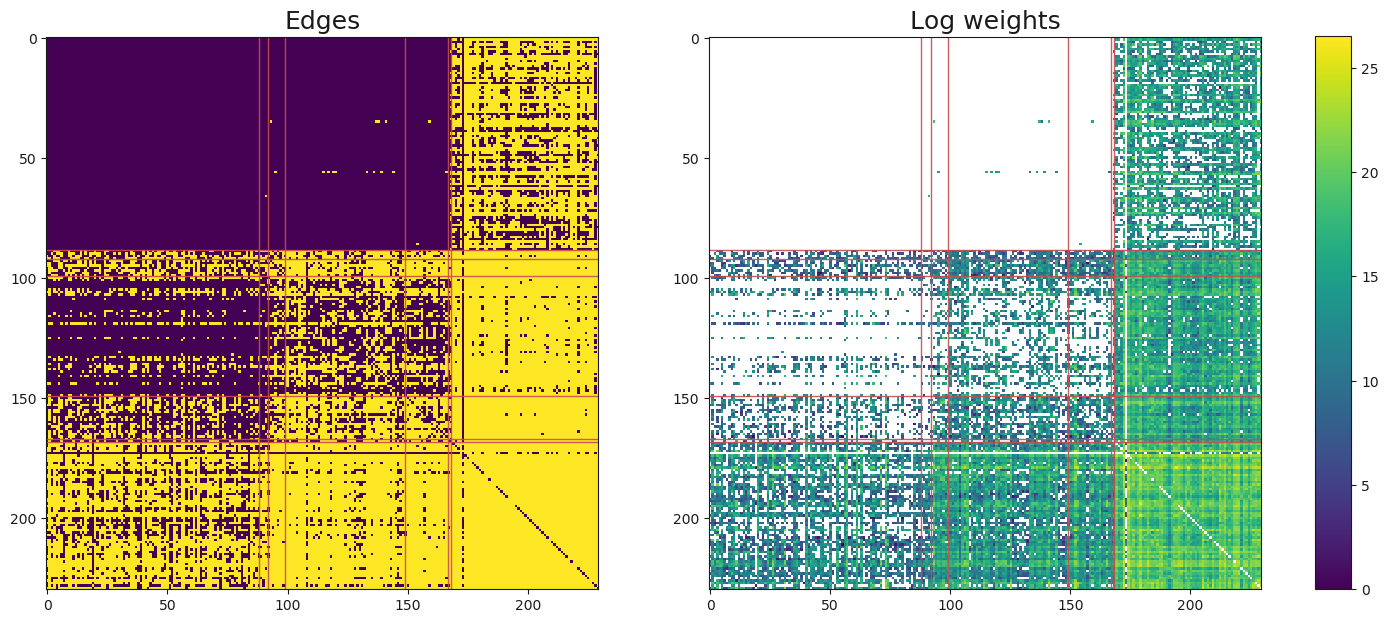

In [112]:
# Sort classes by the average in-degree (dim=0): number of importets to this country
classes = q_eta.argmax(dim=0).float()
classes, perm = permute_by_degree(classes, A_edges, 0)
order = classes.argsort()
cs = class_sizes(classes)
fig, axs = plt.subplots(1,2, figsize=(18,9))
axs[0].set_title('Edges', size=18)
axs[1].set_title('Log weights', size=18)
axs[0].imshow(A_edges[order,:][:,order].numpy(), cmap='viridis')
acc = -1
for i in cs[:-1]:
    acc += i
    axs[0].axvline(acc, color='r', linestyle='-', linewidth=1, alpha=0.9)
    axs[0].axhline(acc, color='r', linestyle='-', linewidth=1, alpha=0.9)
ax = axs[1].imshow(A.log()[order,:][:,order].numpy(), cmap='viridis')
acc = -1
for i in cs[:-1]:
    acc += i
    axs[1].axvline(acc, color='r', linestyle='-', linewidth=1, alpha=0.9)
    axs[1].axhline(acc, color='r', linestyle='-', linewidth=1, alpha=0.9)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.188, 0.02, 0.615])
fig.colorbar(ax, cax=cbar_ax, aspect=30)
#plt.savefig('../examples/images/wt_A_dcsbm.pdf')
plt.show()


In [105]:
print('Total #countries:', len(countries_id))
for i in classes.unique().sort().values:
    g = countries_id[classes==i]
    print('Class %d (%d countries):' % (i, len(g)))
    print(g)

Total #countries: 230
Class 0 (89 countries):
['afg' 'ago' 'aia' 'and' 'ant' 'asm' 'ata' 'atf' 'bgd' 'bhs' 'brn' 'btn'
 'bvt' 'caf' 'cck' 'cod' 'cok' 'com' 'cub' 'cxr' 'cym' 'dji' 'eri' 'esh'
 'flk' 'fro' 'fsm' 'gab' 'gib' 'gin' 'gnb' 'gnq' 'grd' 'grl' 'gum' 'hmd'
 'hnd' 'hti' 'iot' 'irq' 'kir' 'kna' 'kwt' 'lao' 'lbr' 'lby' 'lca' 'lso'
 'mhl' 'mkd' 'mng' 'mnp' 'msr' 'myt' 'nam' 'nfk' 'niu' 'nru' 'pcn' 'plw'
 'png' 'prk' 'rwa' 'sdn' 'sgs' 'shn' 'slb' 'sle' 'smr' 'som' 'spm' 'swz'
 'syc' 'tca' 'tcd' 'tjk' 'tkl' 'tkm' 'tls' 'tuv' 'umi' 'ury' 'uzb' 'vat'
 'vgb' 'vut' 'wlf' 'wsm' 'yem']
Class 1 (4 countries):
['fji' 'mne' 'ncl' 'pyf']
Class 2 (7 countries):
['arm' 'bhr' 'bol' 'dom' 'kaz' 'mda' 'zmb']
Class 3 (50 countries):
['abw' 'atg' 'bdi' 'ben' 'bfa' 'blz' 'bmu' 'brb' 'bwa' 'civ' 'cmr' 'cog'
 'cri' 'cyp' 'dma' 'ecu' 'geo' 'gmb' 'gtm' 'guy' 'irn' 'isl' 'jam' 'jor'
 'ken' 'khm' 'lbn' 'lka' 'mar' 'mdg' 'mdv' 'mli' 'mlt' 'mmr' 'moz' 'mrt'
 'ner' 'nga' 'omn' 'pan' 'pry' 'pse' 'qat' 'sen' 'st

To analyze the class and connection probability distributions $\theta$ and $B$ we plot the histograms of samples from the variational distribution.

In [92]:
nonempty_classes = q_eta.detach().argmax(dim=0).unique()[perm]
num_ne = len(nonempty_classes)

In [93]:
q_theta_nonempty = q_theta.detach()[nonempty_classes]
num_samples = 1000
theta_samples = Dirichlet(q_theta_nonempty).sample([num_samples])

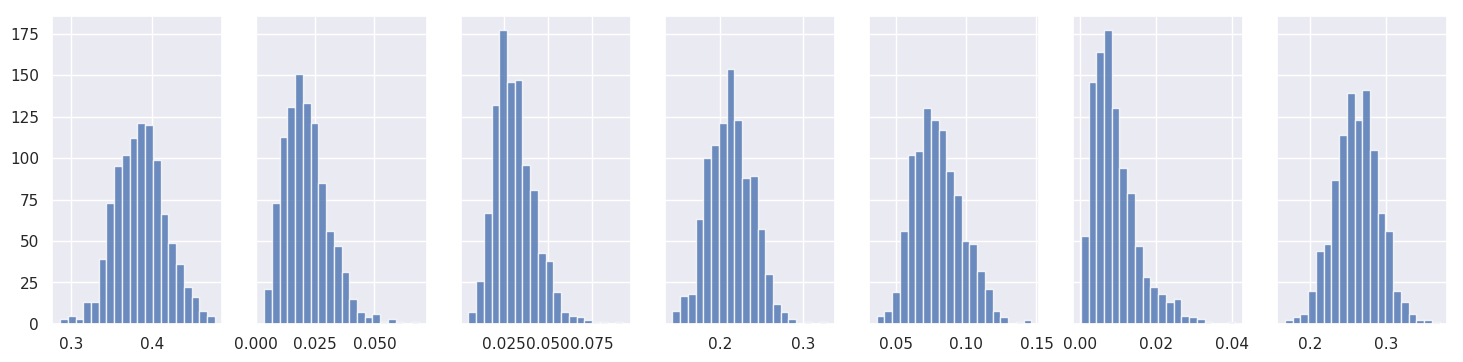

In [113]:
sns.set()
fig, axs = plt.subplots(1, num_ne, figsize=(18,4), sharey=True)
bins, alpha = 20, 0.8
for i in range(num_ne):
    axs[i].hist(theta_samples[:,i], bins=bins, alpha=alpha) 
fig.suptitle(r'Posterior class probabilities $\theta$', fontsize=18)
#plt.savefig('../examples/images/wt_theta_dcsbm.pdf')
plt.show()

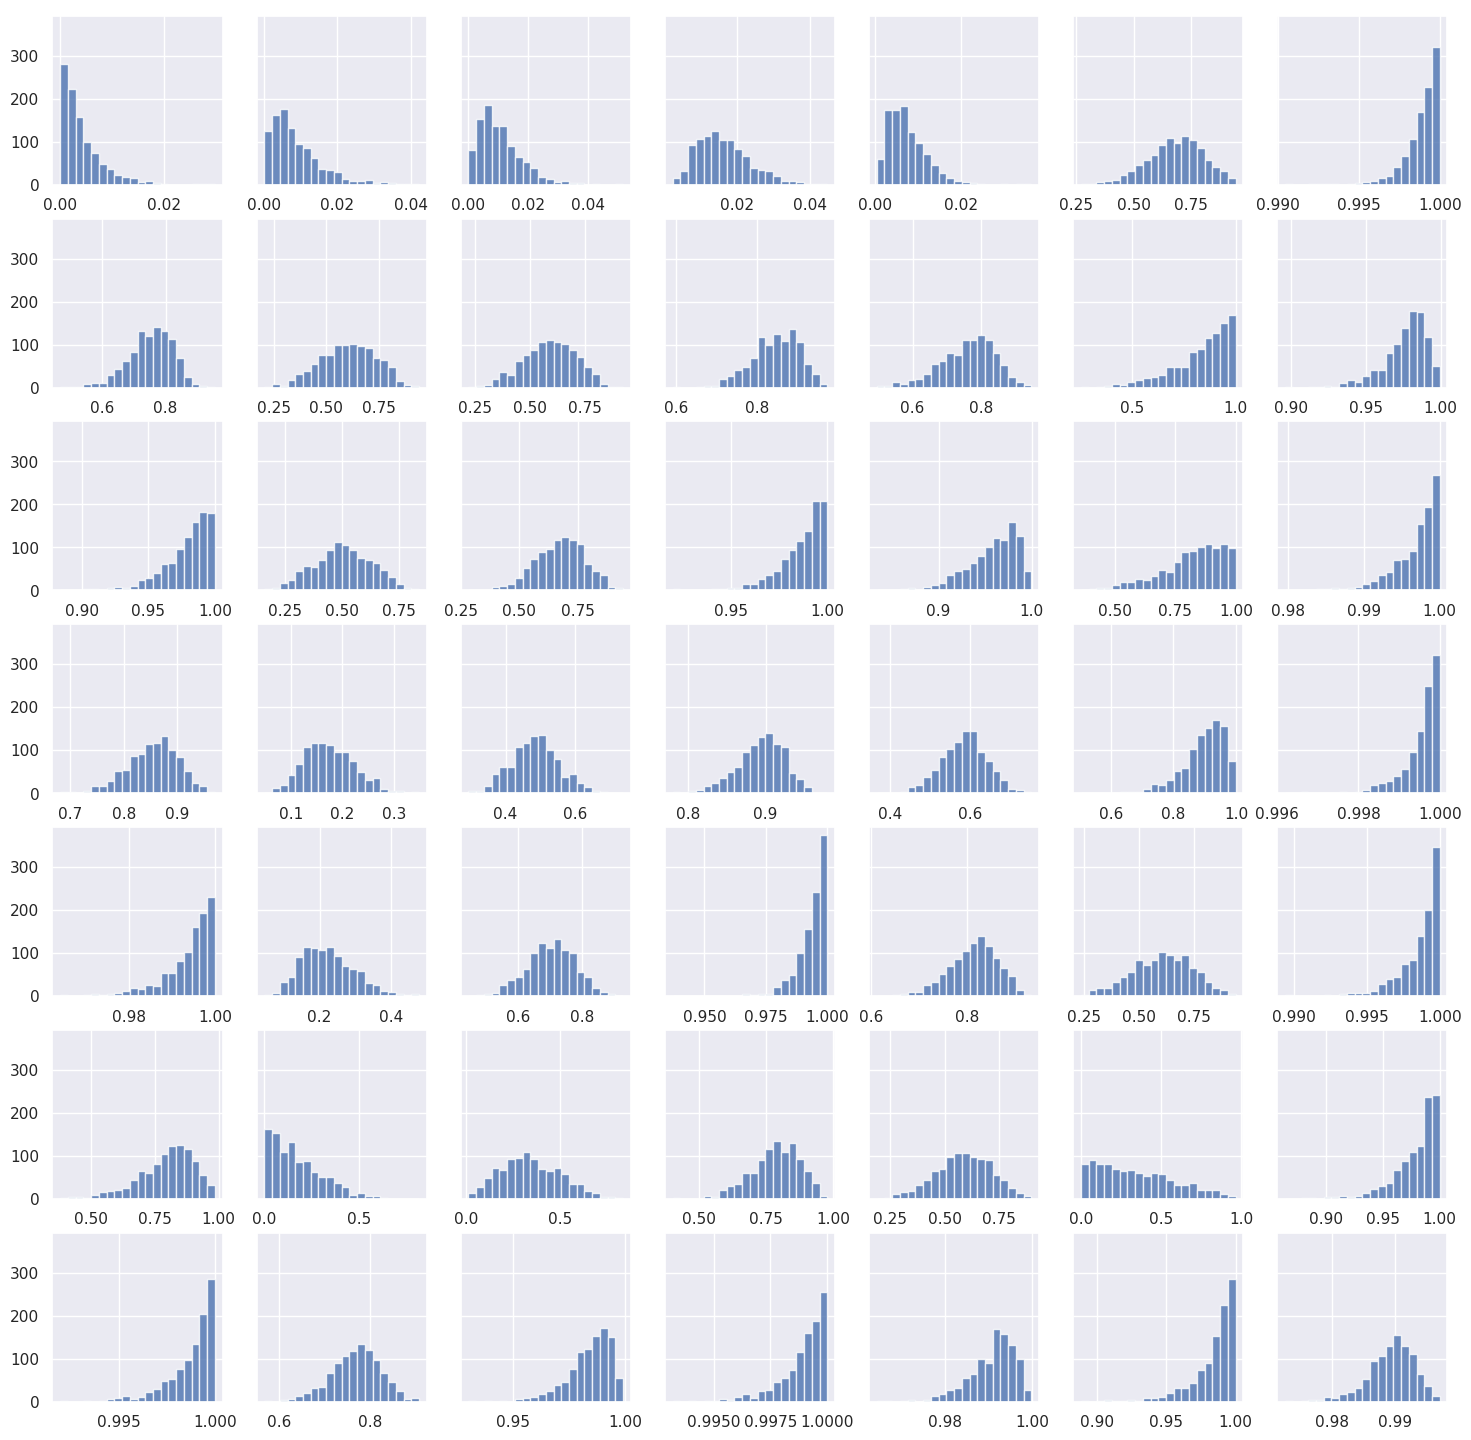

In [114]:
q_B_nonempty = q_B.detach()[nonempty_classes,:,:][:,nonempty_classes,:]
B_samples = Beta(q_B_nonempty[:,:,0], q_B_nonempty[:,:,1]).sample([num_samples])

fig, axs = plt.subplots(num_ne, num_ne, figsize=(18,18), sharey=True)
bins, alpha = 20, 0.8
for i in range(num_ne):
    for j in range(num_ne):
        axs[i,j].hist(B_samples[:,i, j], bins=bins, alpha=alpha) 
fig.suptitle(r'Posterior connection probabilities $B$', fontsize=18)
#plt.savefig('../examples/images/wt_B_dcsbm.pdf')
plt.show()

We see that the DCSBM can produce a smaller loss (also a better fit) for the unweighted data. The DCSBM uses less classes but also creates several small groups of 1, 4 or 7 nodes, which may be a training artefacts. Therefore, we would suggest to repeat the training increasing number of trials and epochs.
In the next notebook we will investigate not just the existence of the deges but their weights.